# Climate in Plovdiv

In [1]:
import rasterio
import os
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import pandas as pd

Read Plovdiv

In [7]:
import urllib.request
import os
import zipfile

zip_file_url = 'https://github.com/atanasova16/GeospatialAnalysisProject/raw/main/Analysis_and_Exploration/Data/Bulgaria_gdf/Bulgaria_regions_NUTS_3.zip'
zip_file_name = "Bulgaria_regions_NUTS_3.zip"
    
urllib.request.urlretrieve(zip_file_url ,zip_file_name) 

z = zipfile.ZipFile(zip_file_name)

z.extractall()

filename = "Bulgaria_regions_NUTS_3.shp"

bg = gpd.read_file(os.path.join(os.getcwd(), filename))

In [9]:
#bg = gpd.read_file(r"C:\Users\User\Documents\UNITN\Geospatial\raster\Bulgaria_regions_NUTS_3\Bulgaria_regions_NUTS_3.shp")
plovdiv = bg[bg.NAME_LATN == "Plovdiv"]
plovdiv

,NAME_LATN,NUTS_NAME,Pop_2019,Pop_city,Pop_villag,Area,geometry
14,Plovdiv,Пловдив,666801,505158,161643,5962,"MULTIPOLYGON (((5544436.088 2303884.268, 55444..."


In [10]:
#municipalities = gpd.read_file("C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\municipalities.geojson")
municipalities = gpd.read_file("https://raw.githubusercontent.com/atanasova16/GeospatialAnalysisProject/main/Analysis_and_Exploration/Data/Bulgaria_gdf/municipalities.geojson")
plovdiv_city = municipalities[municipalities.nuts4 == "PDV22"]

In [11]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(plovdiv.to_crs(epsg=4326))

coords_pld_city = getFeatures(plovdiv_city.to_crs(4326))

# Climate data

## This is done with the original data taken

https://worldclim.org/data/worldclim21.html

WorldClim

Creative Commons Attribution-ShareAlike 4.0 International License.

# Precipitation (mm)

For each month

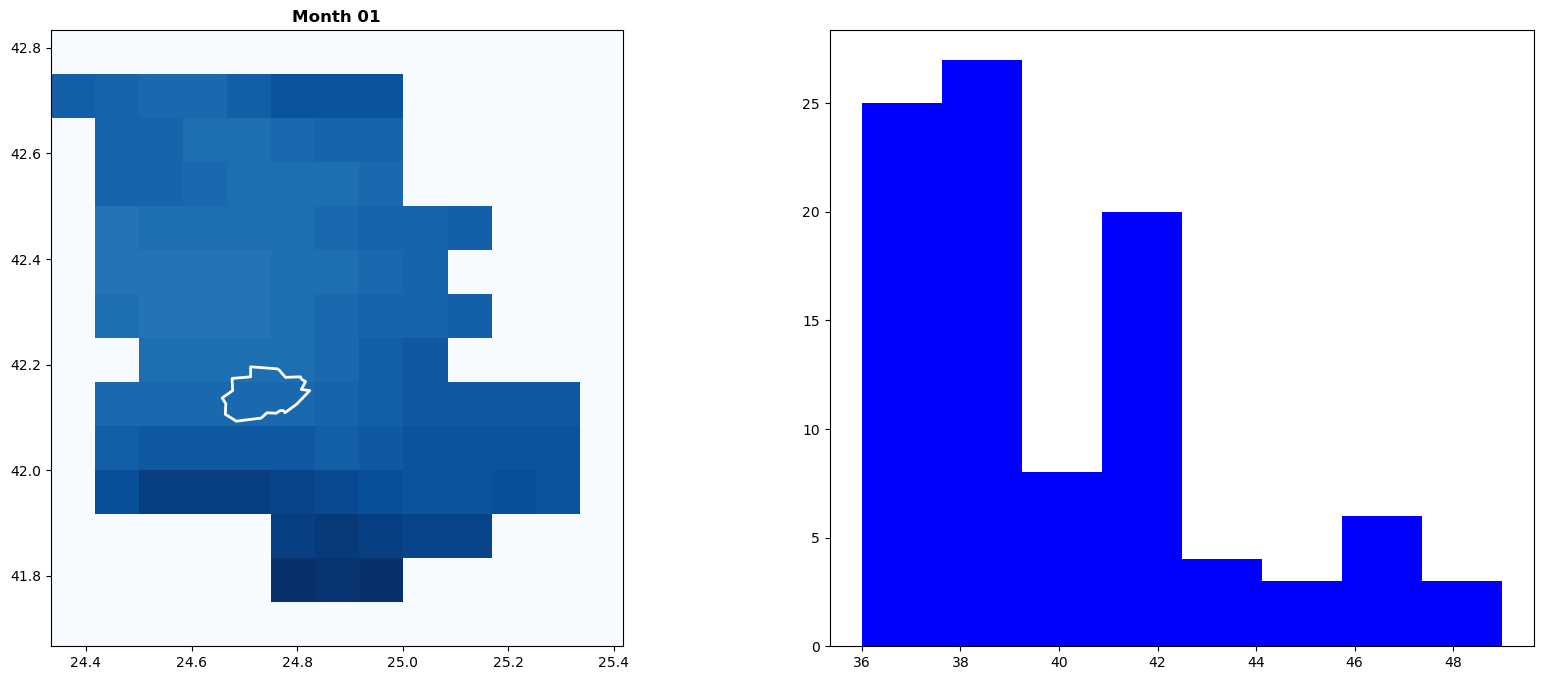

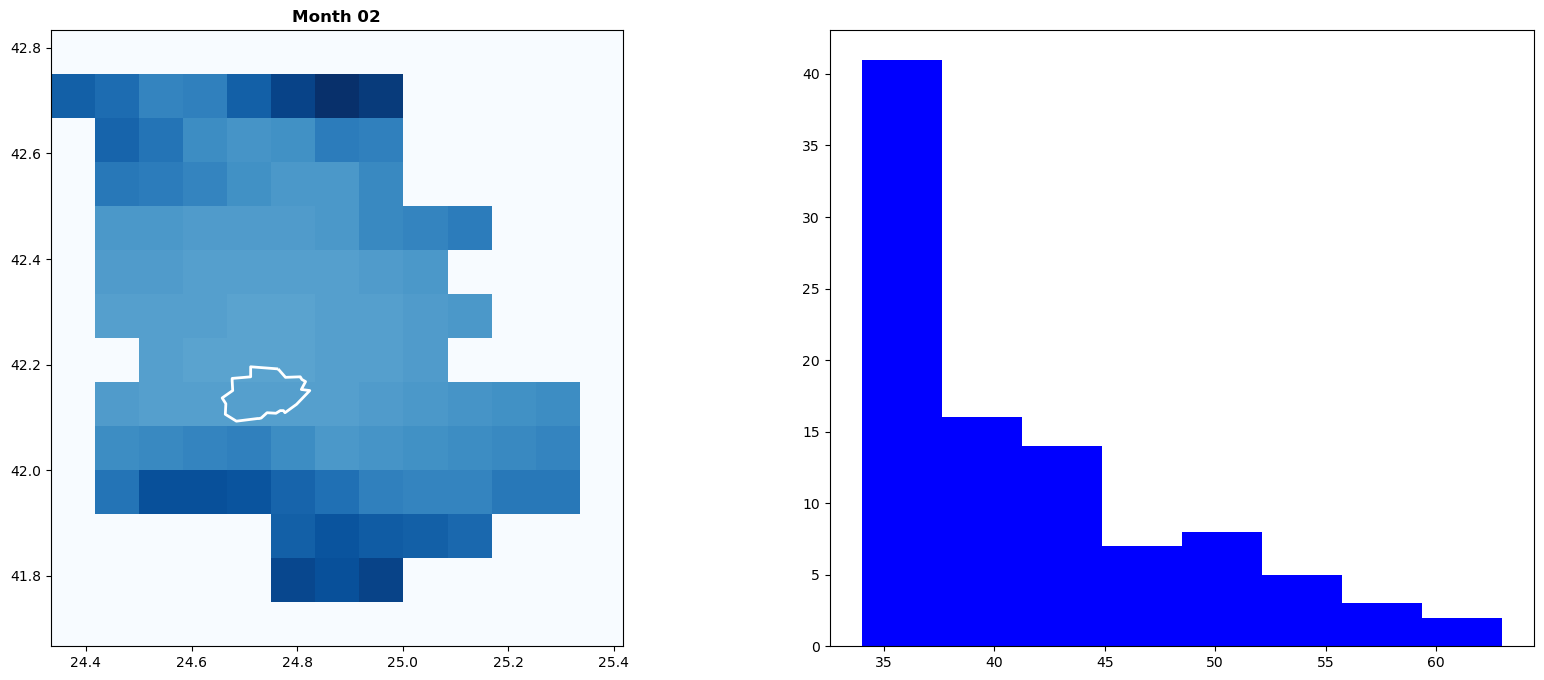

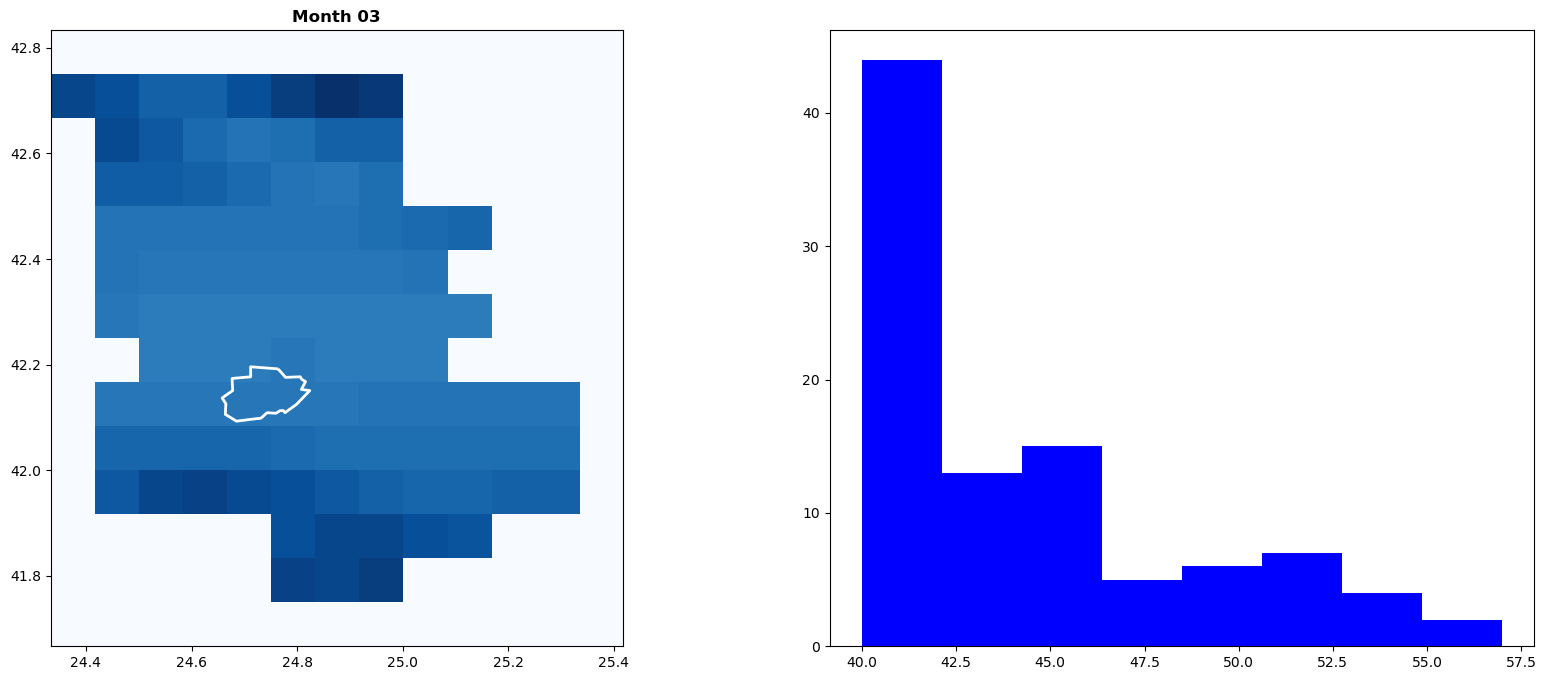

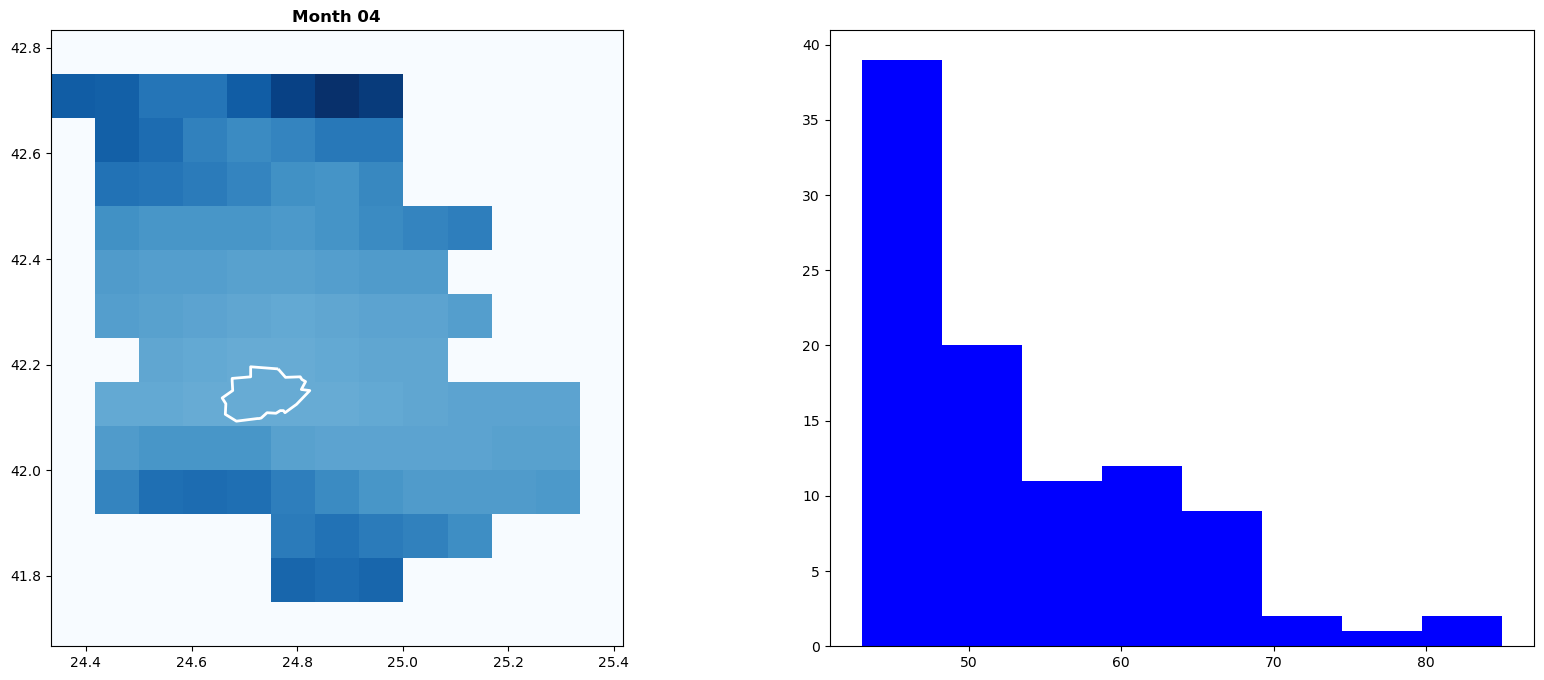

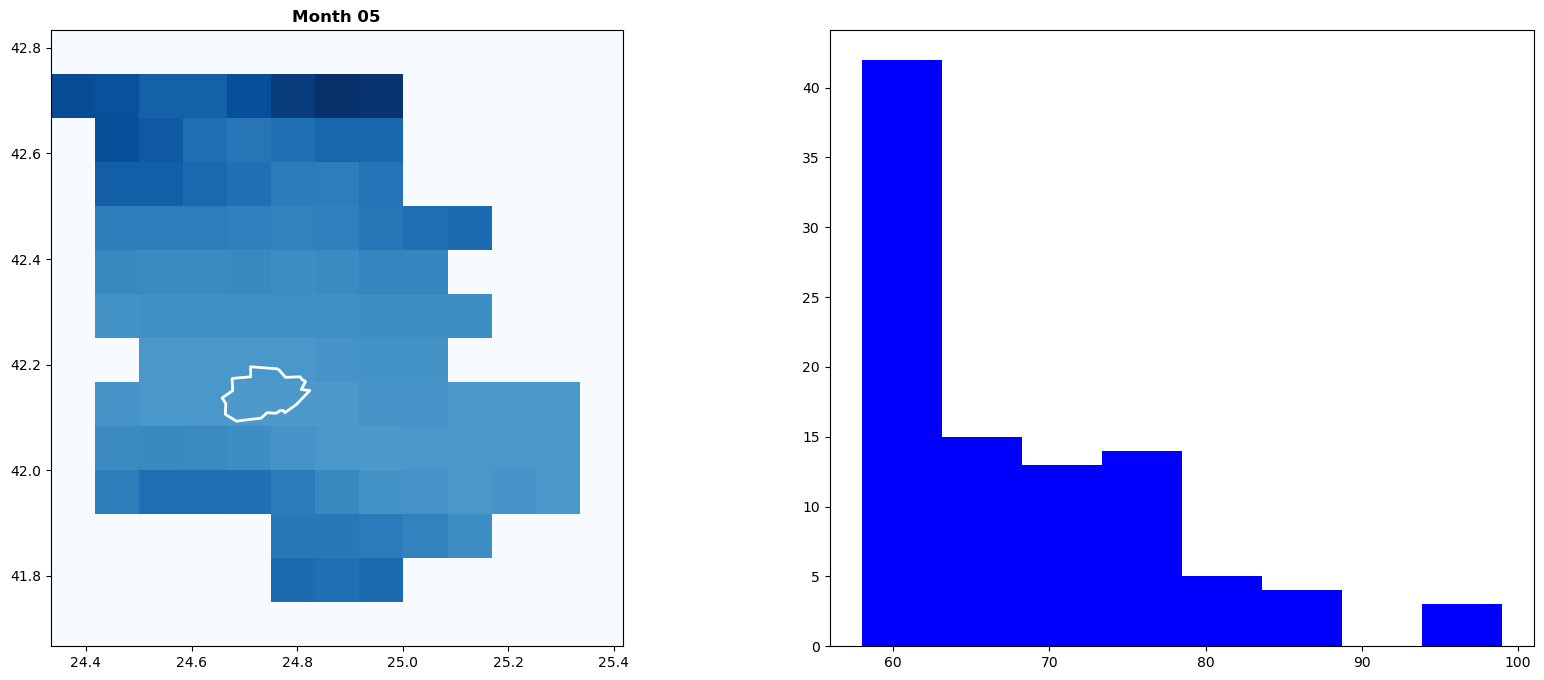

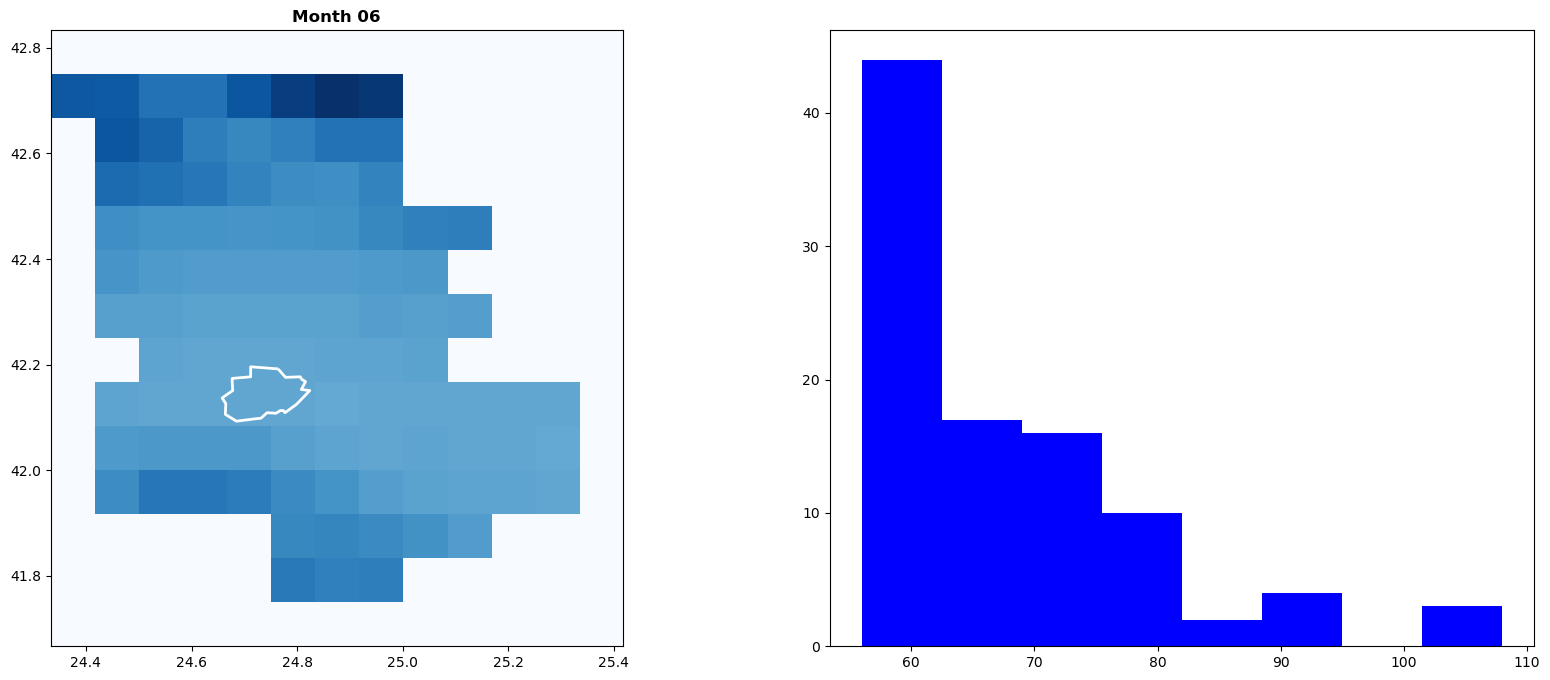

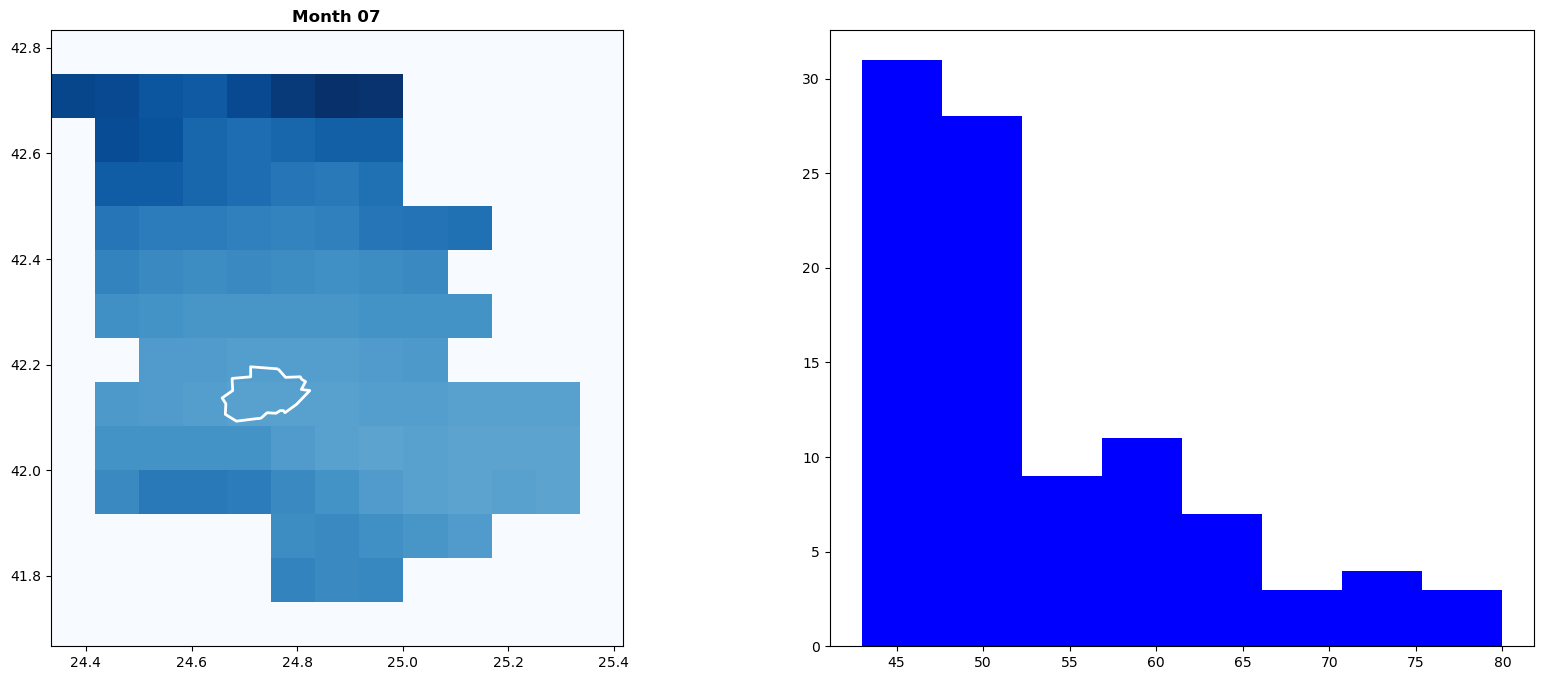

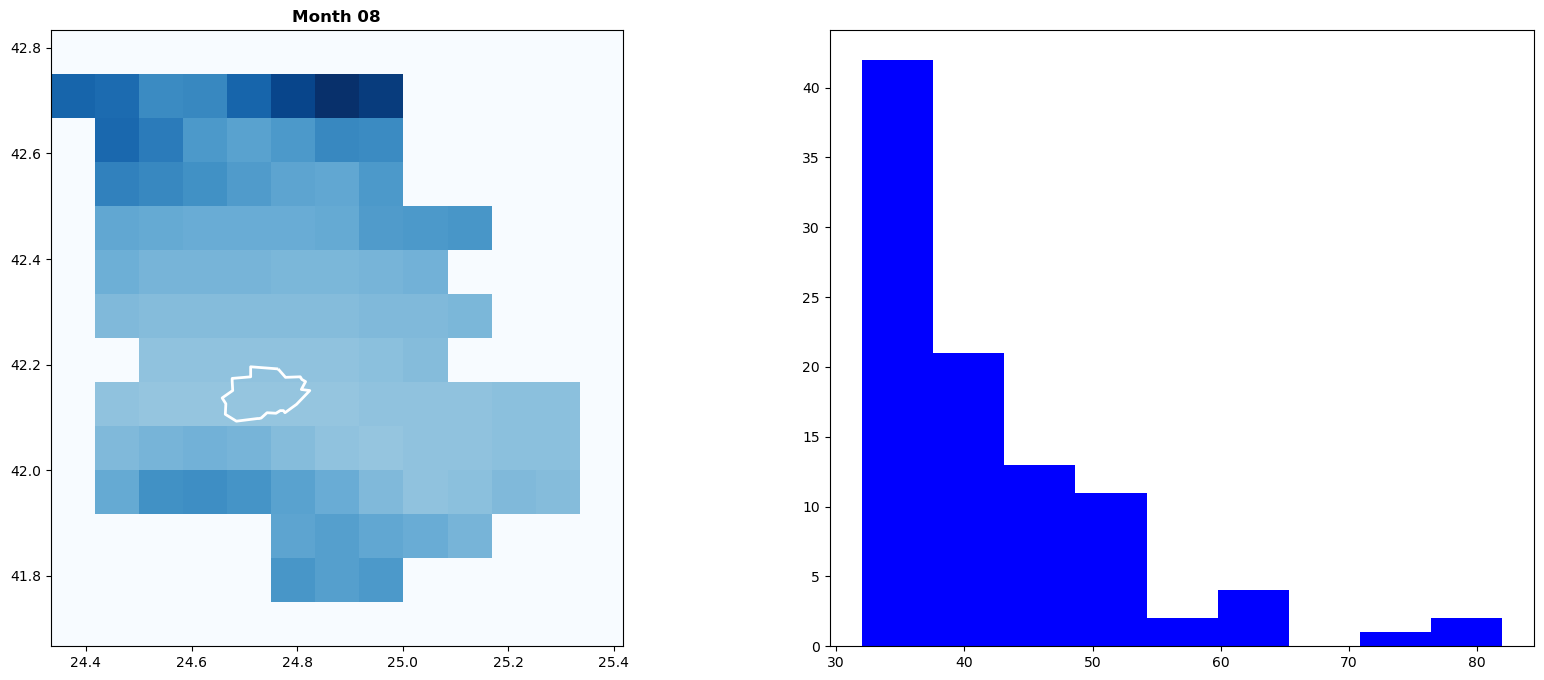

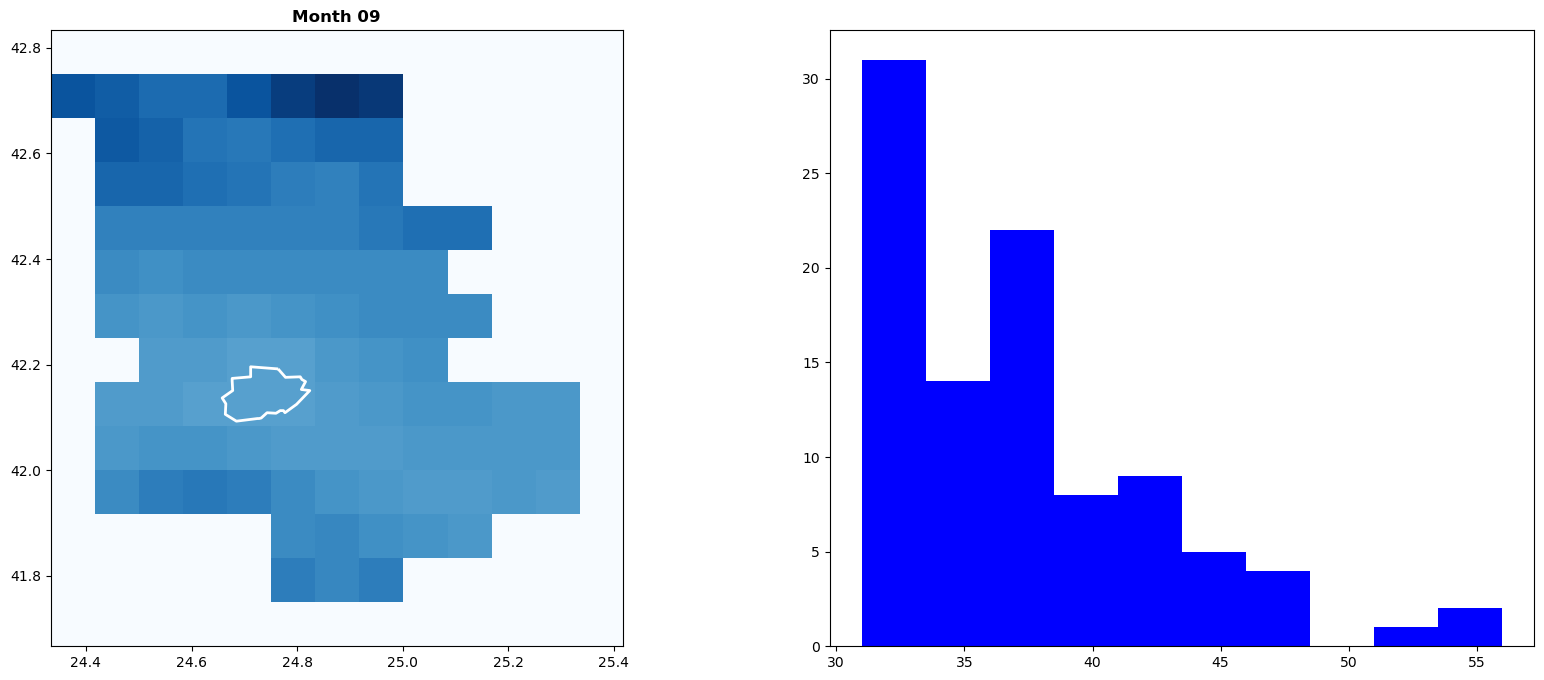

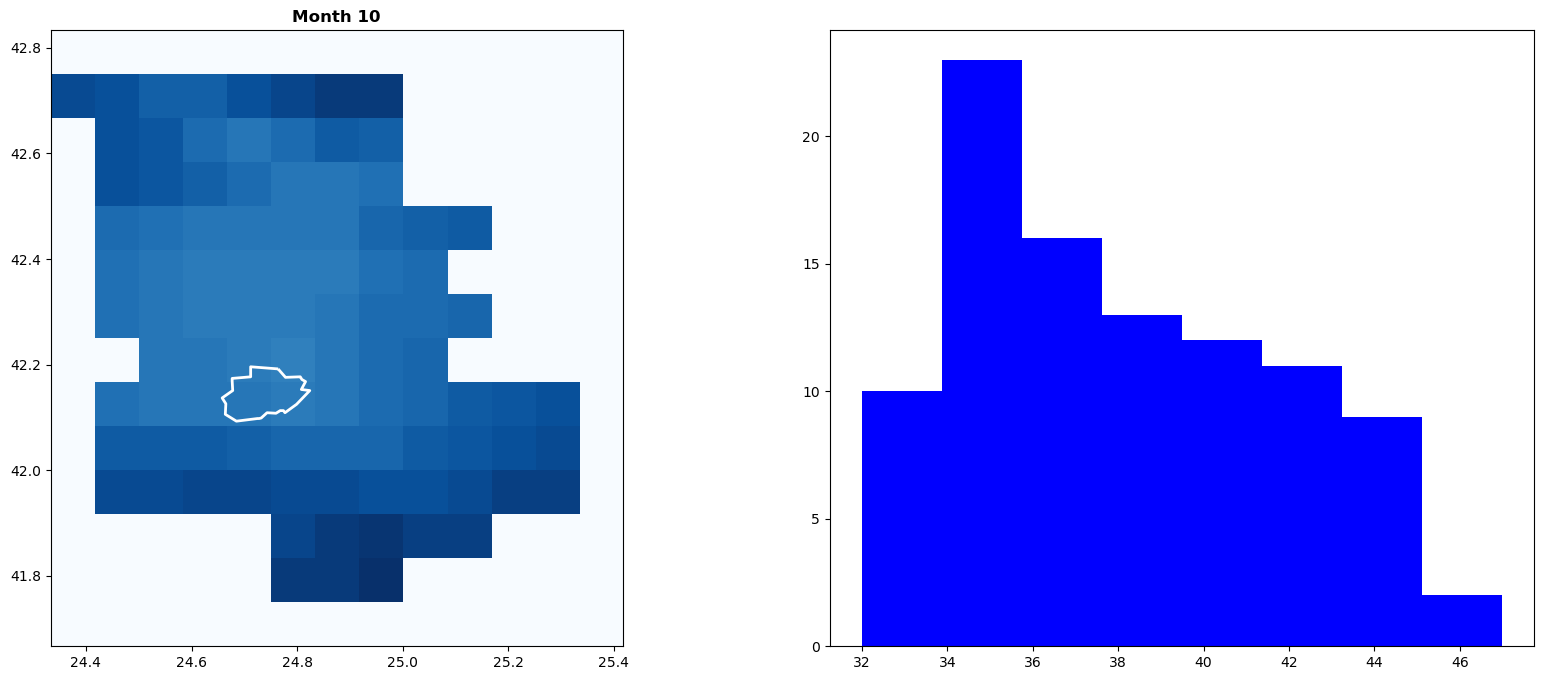

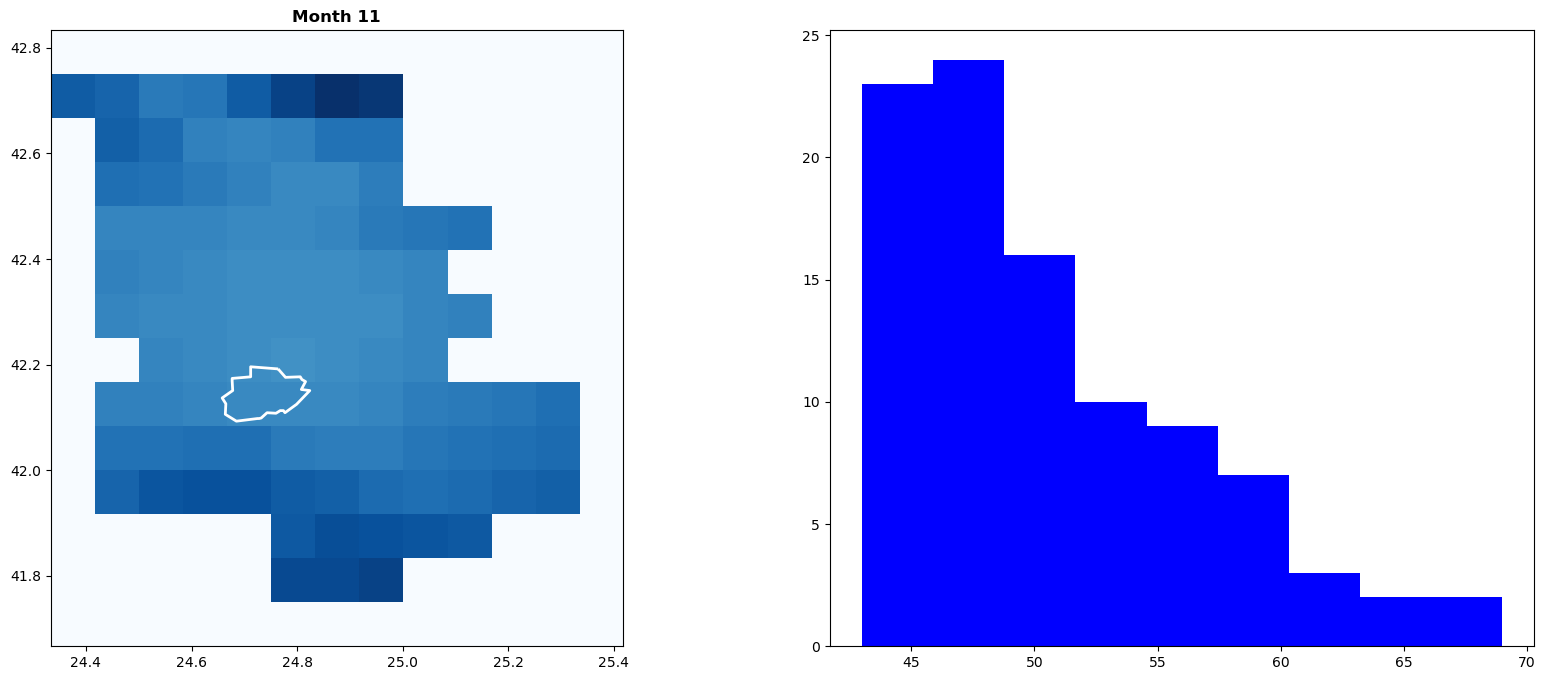

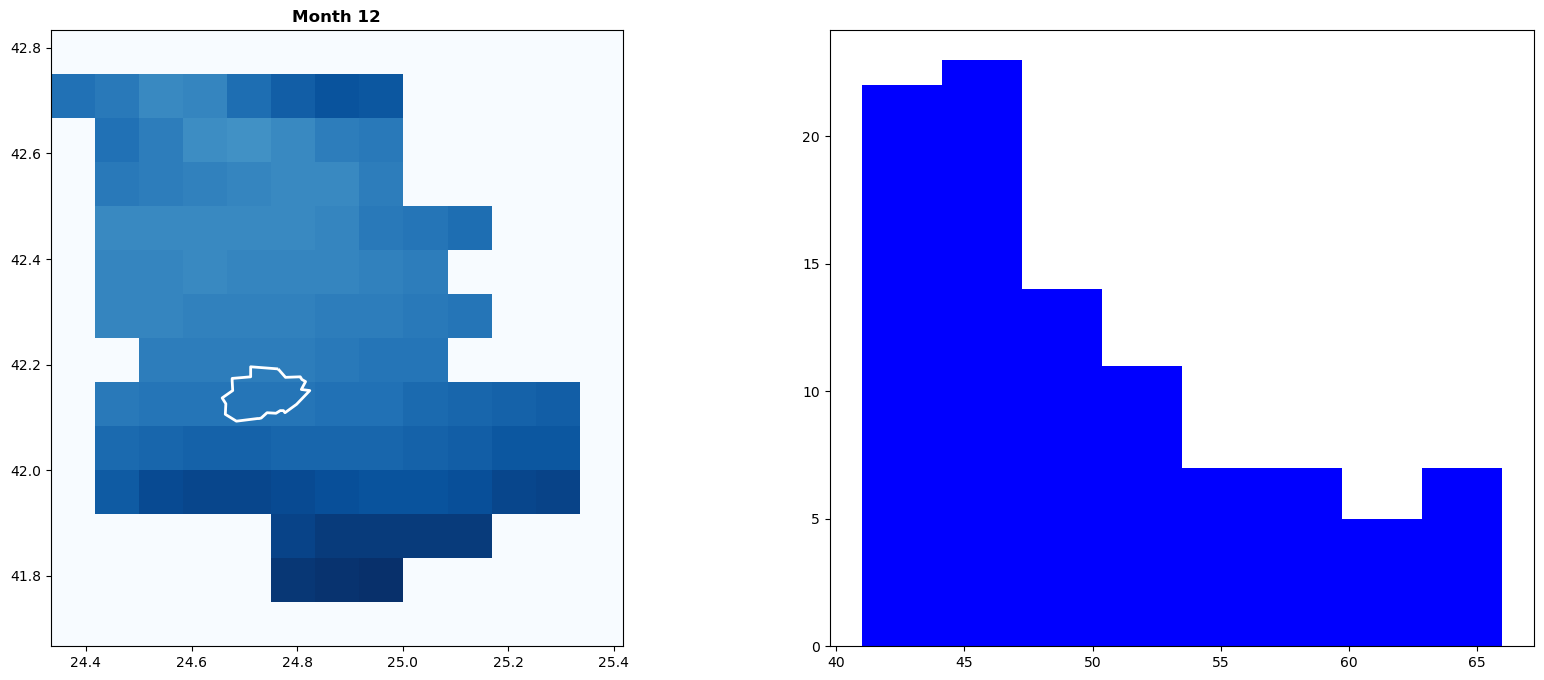

In [17]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
images_months = {}
average_months = {}
images_months_pld_city = {}
average_months_pld_city = {}

for m in all_months:
    file_name_prec = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\precipitation\\wc2.1_5m_prec\\wc2.1_5m_prec_{m}.tif"
    month_prec = rasterio.open(file_name_prec)
    month_data = month_prec.read(1)
    month_data[month_data == -32768] = -1
    #show(month_data, transform = month_prec.transform)

    out_img, out_transform = mask(month_prec, coords, crop=True)
    out_meta = month_prec.meta
    out_img[out_img == -32768] = -1

    pld_city_out, pld_city_out_transform = mask(month_prec, coords_pld_city, crop=True)
    out_meta = month_prec.meta
    pld_city_out[pld_city_out == -32768] = -1

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig = plovdiv_city.plot(facecolor='None', edgecolor='white', linewidth=2, ax = ax1)
    show(out_img, cmap = "Blues", transform = out_transform, ax=ax1, title = f"Month {m}")
    ax2 = plt.hist(out_img[out_img != -1], bins='auto', color="blue")

    #show_hist(out_img, bins=50, alpha=0.3, title=f"Average Precipitation histogram Plovdiv {m}", ax = ax2)

    average_m = out_img[out_img != -1].mean()
    average_months[m] = average_m
    average_m_city = pld_city_out[pld_city_out != -1].mean()
    average_months_pld_city[m] = average_m_city

    images_months[m] = (out_img, out_transform)
    images_months_pld_city[m] = (pld_city_out, pld_city_out_transform)

    

Let's plot the averages

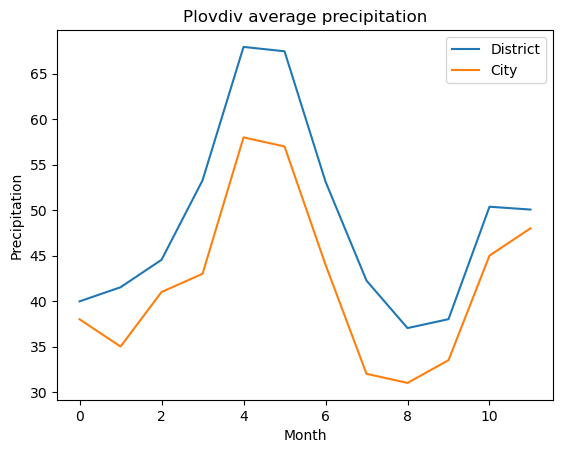

In [18]:

plt.plot(list(average_months.values()), label = "District")
plt.plot(list(average_months_pld_city.values()), label = "City")
plt.title("Plovdiv average precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.legend()

# Wind speed (m s-1)

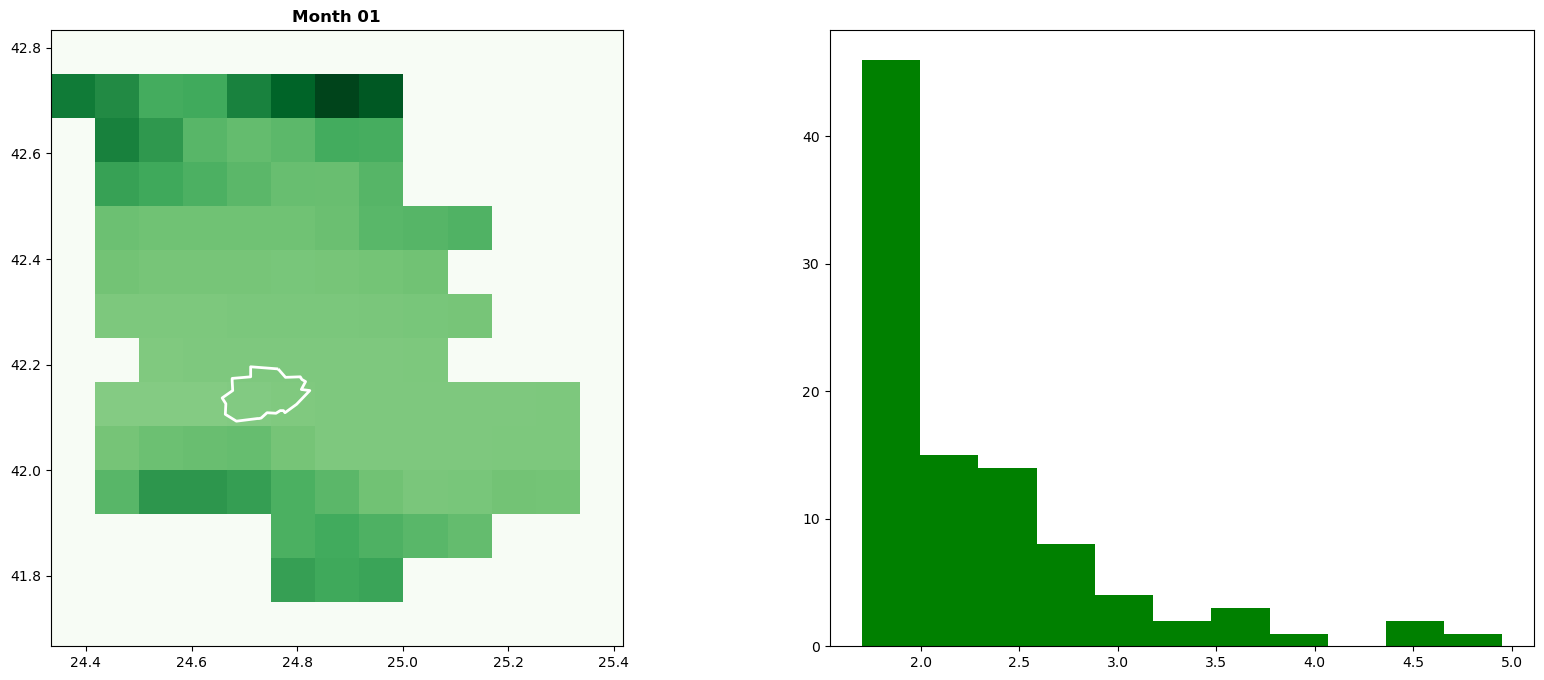

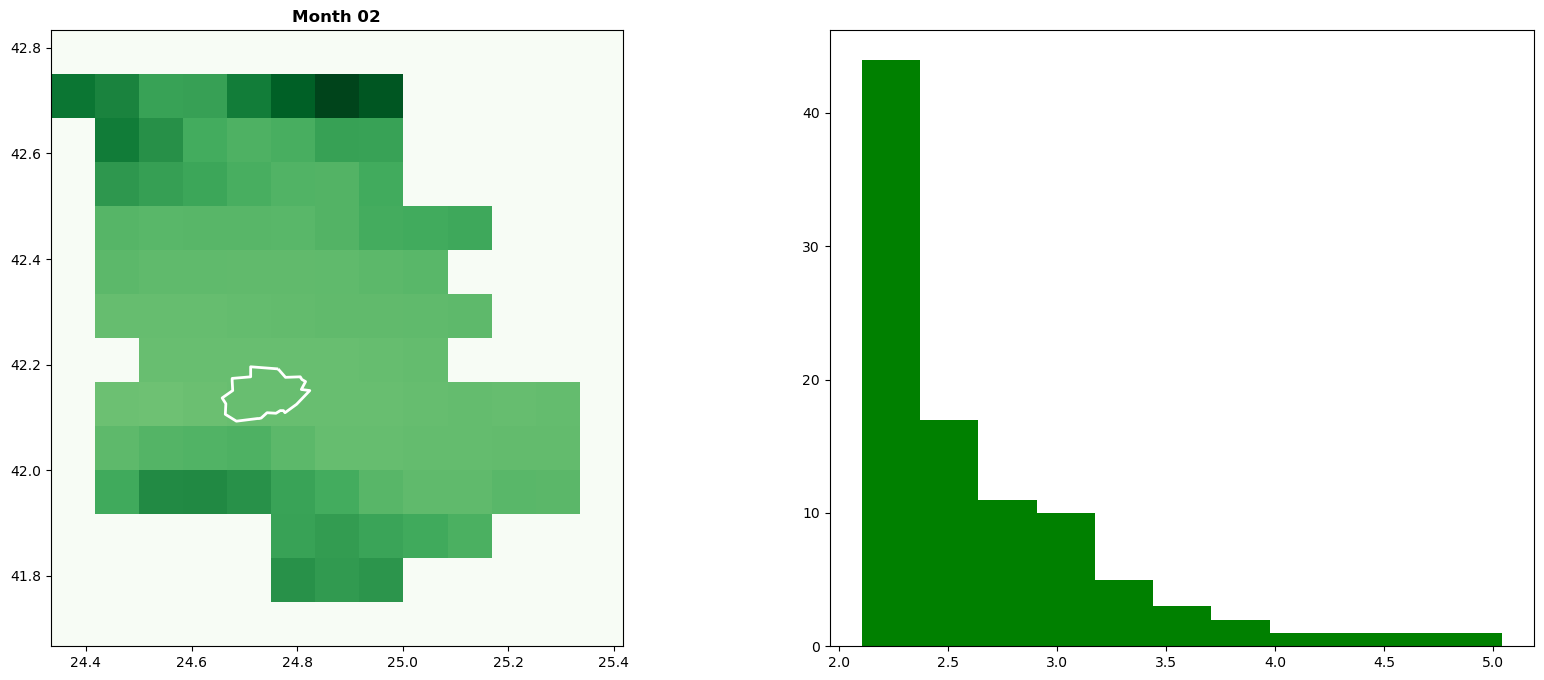

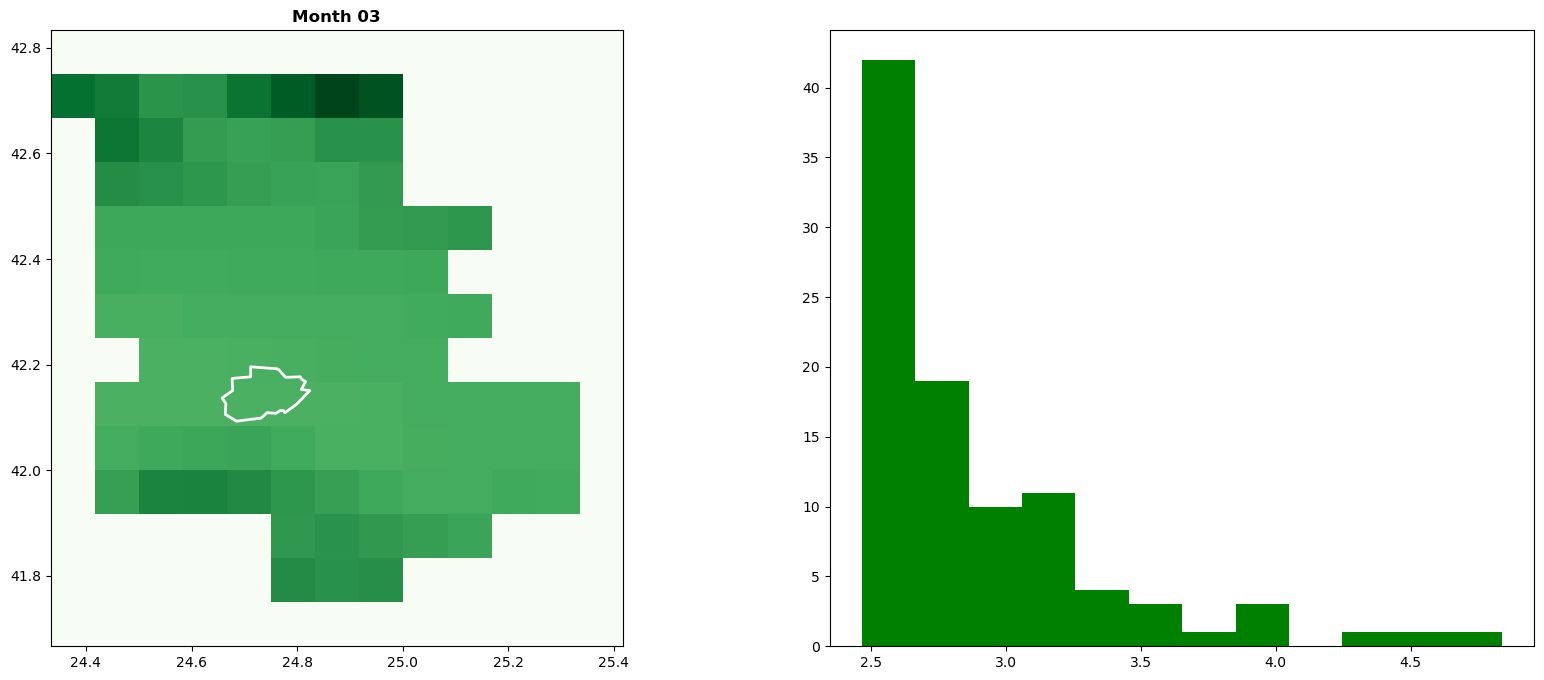

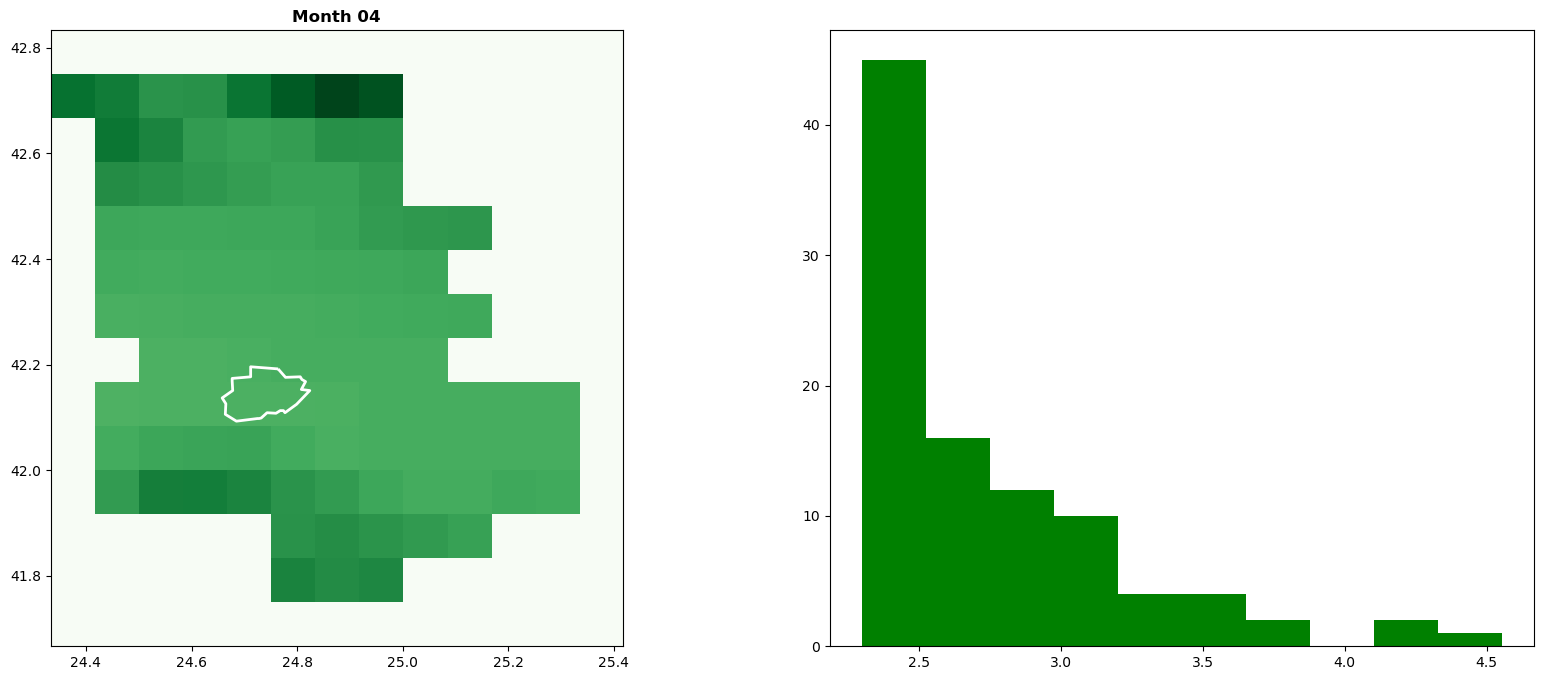

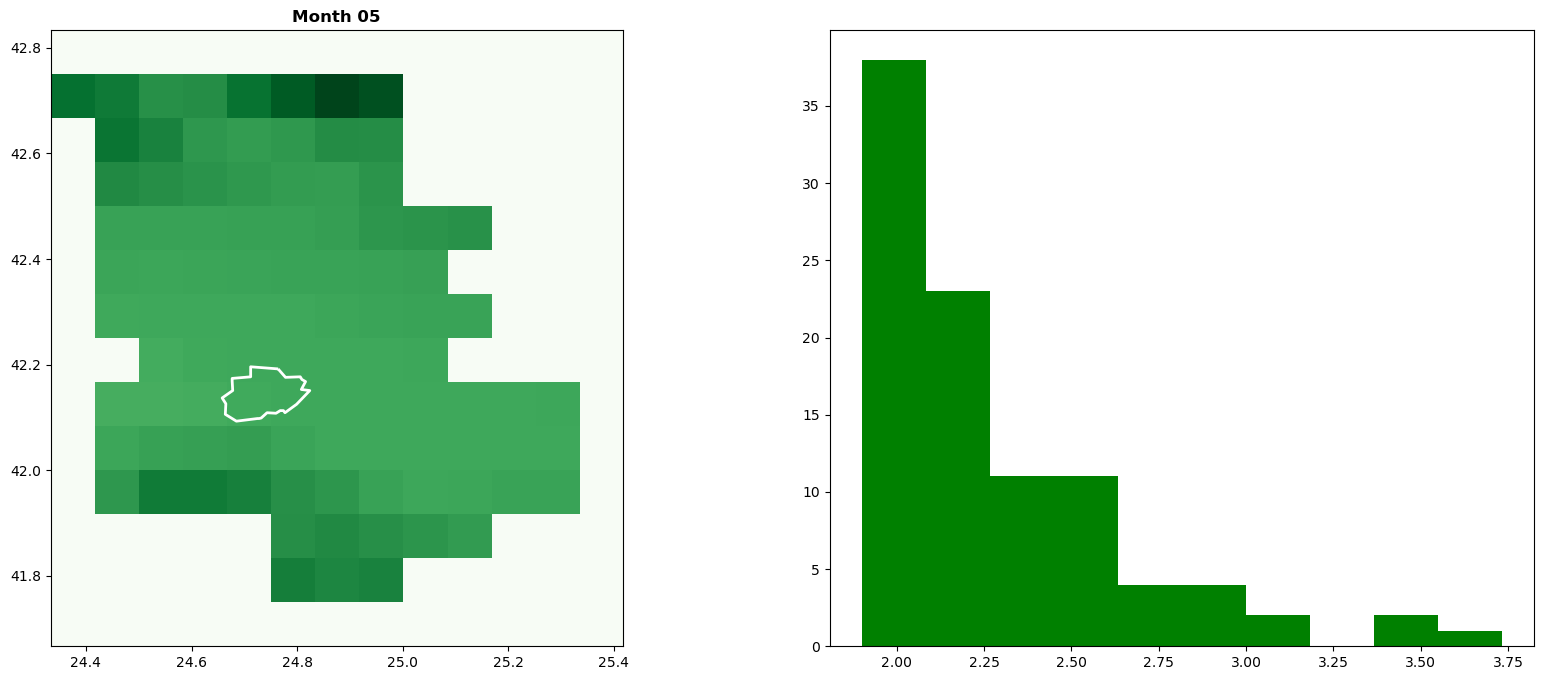

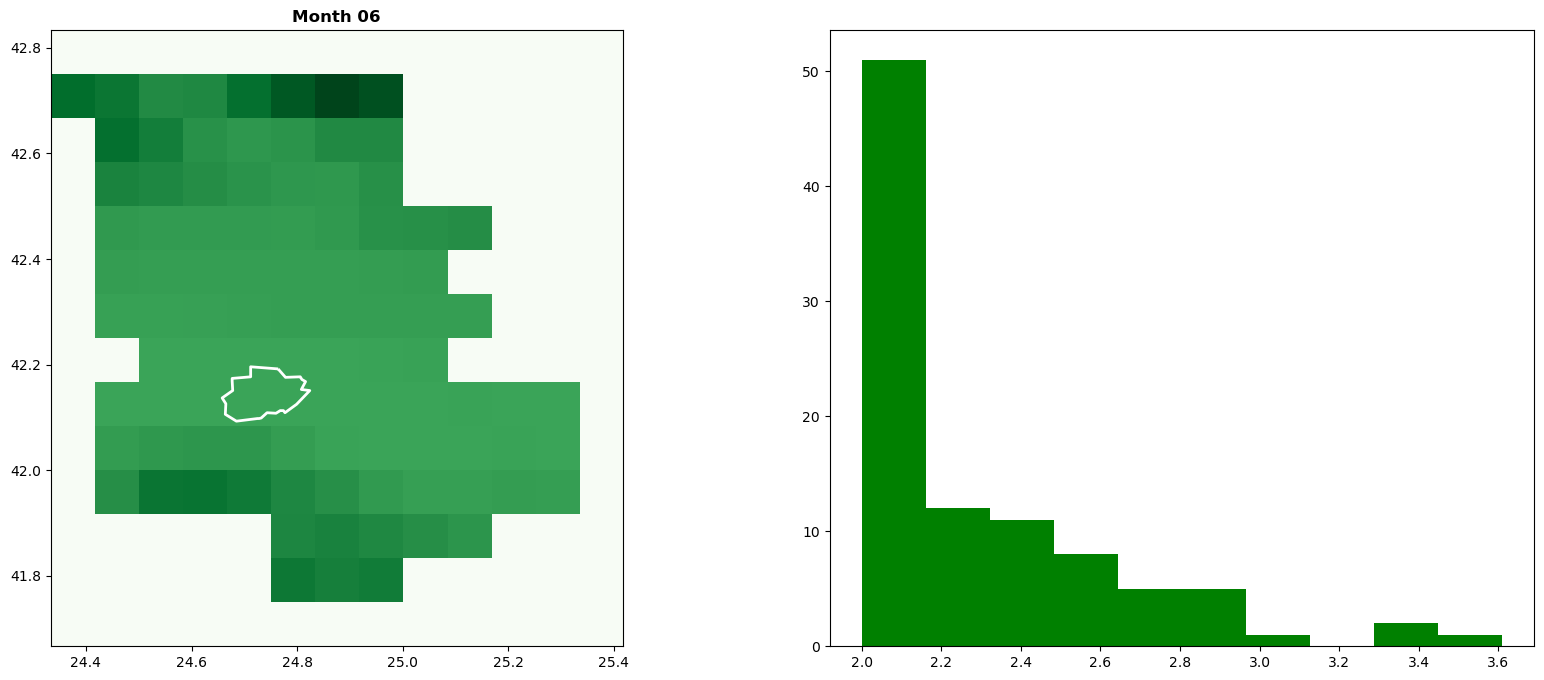

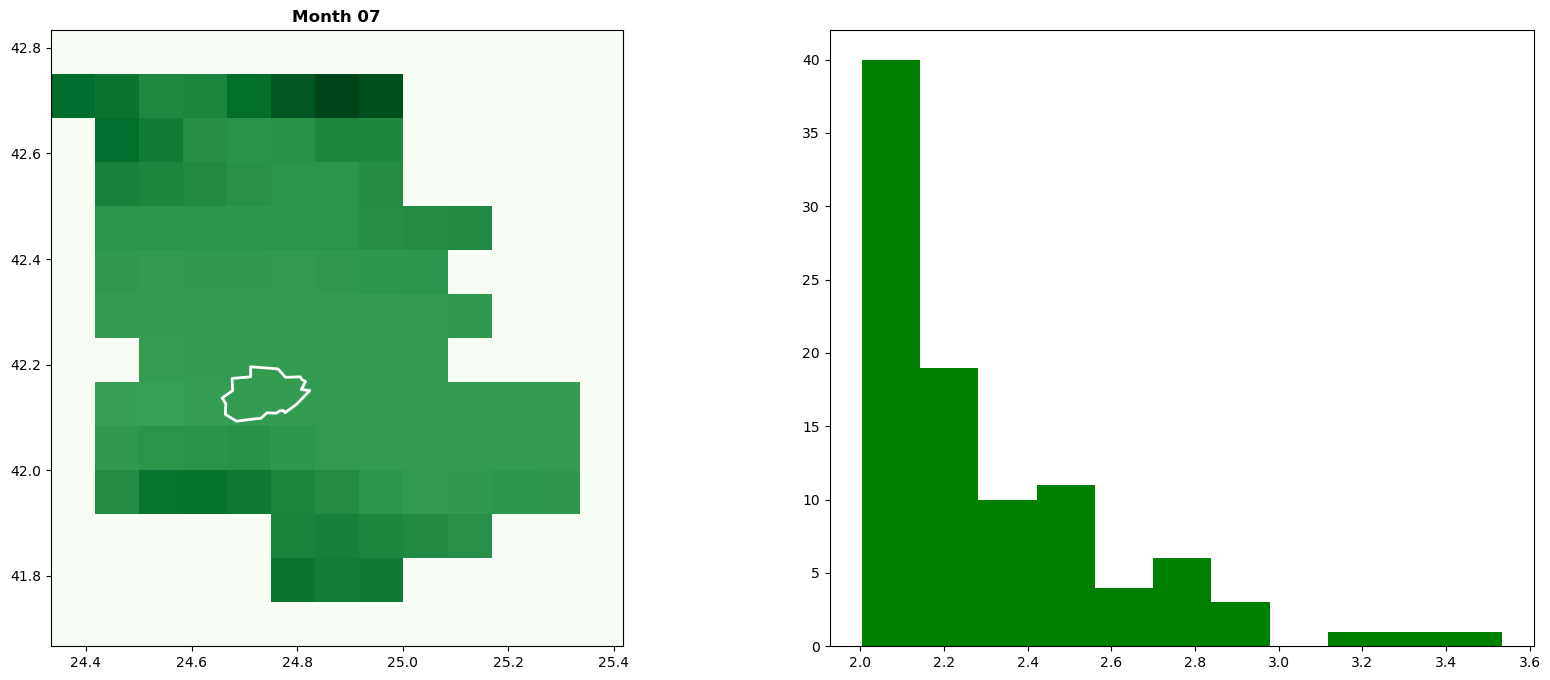

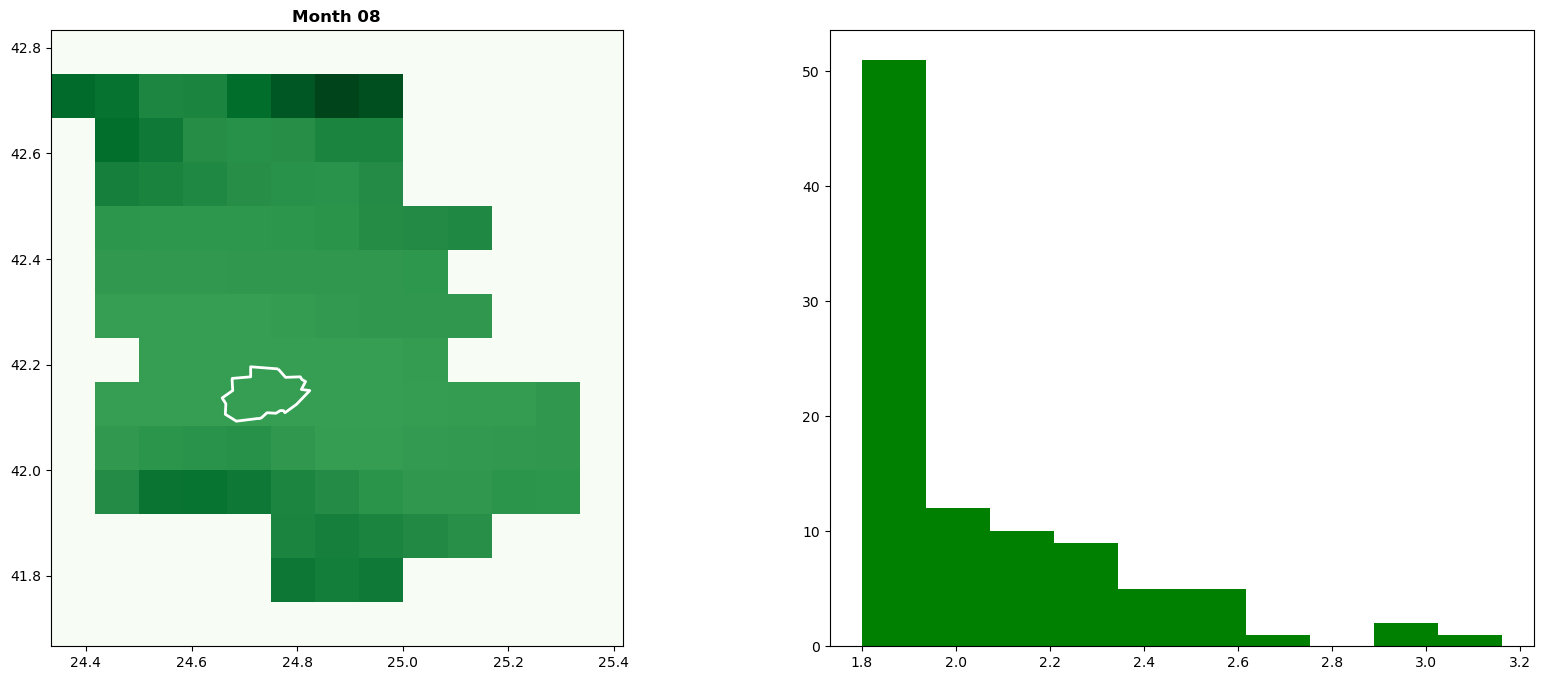

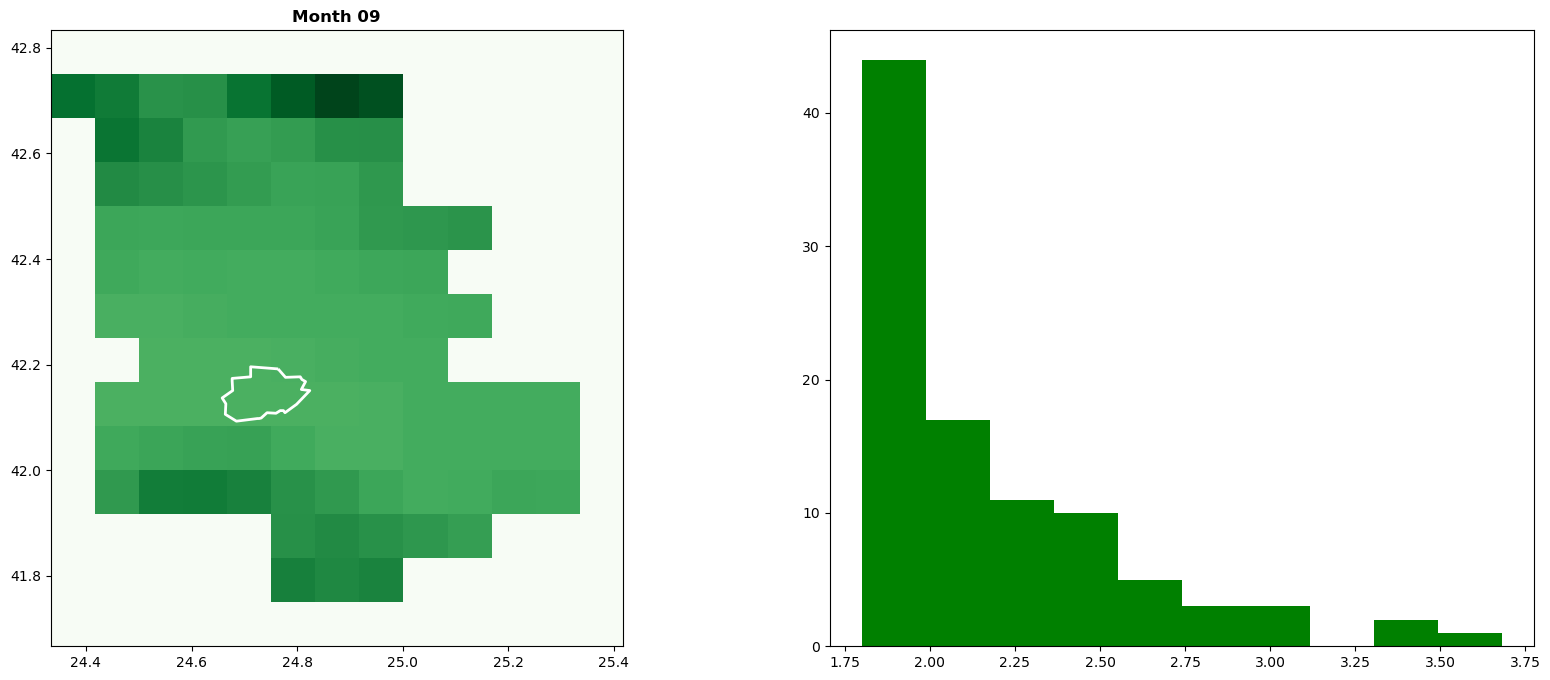

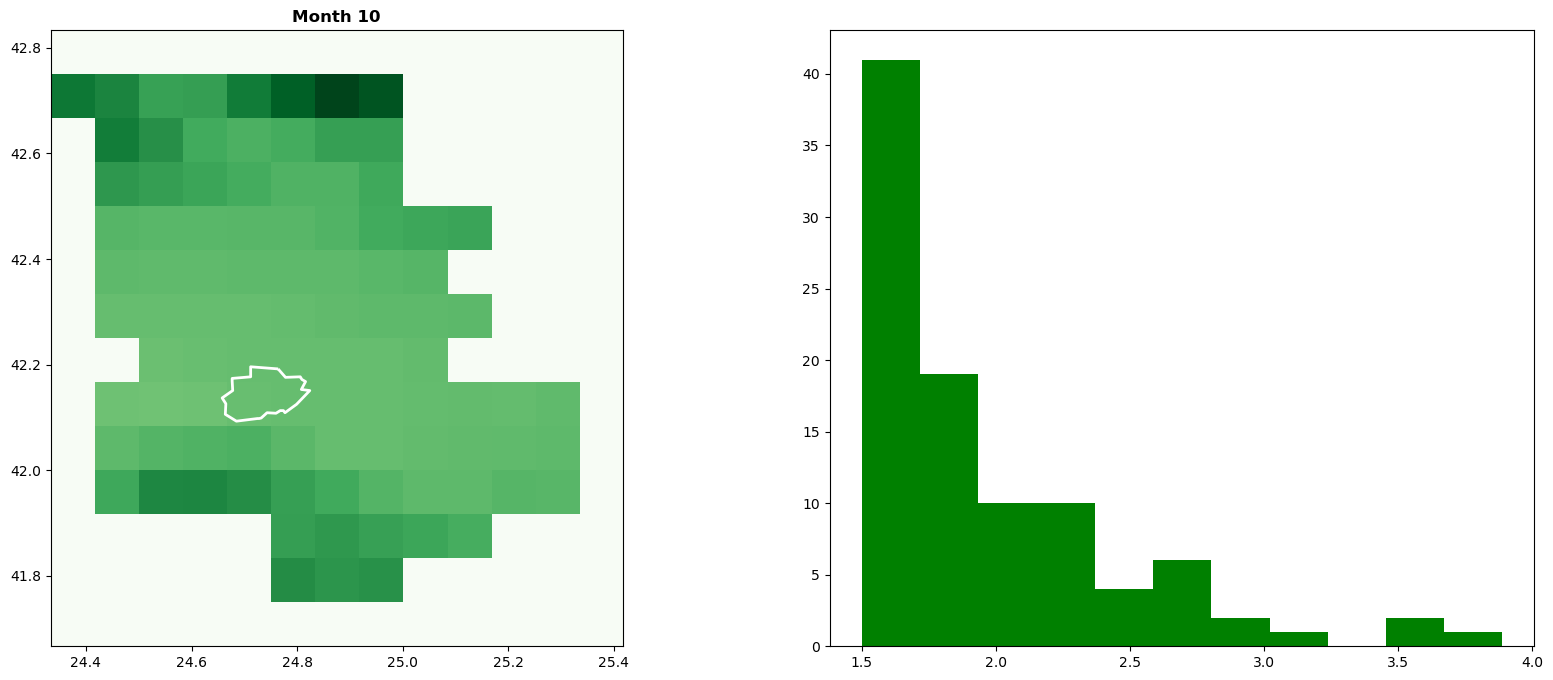

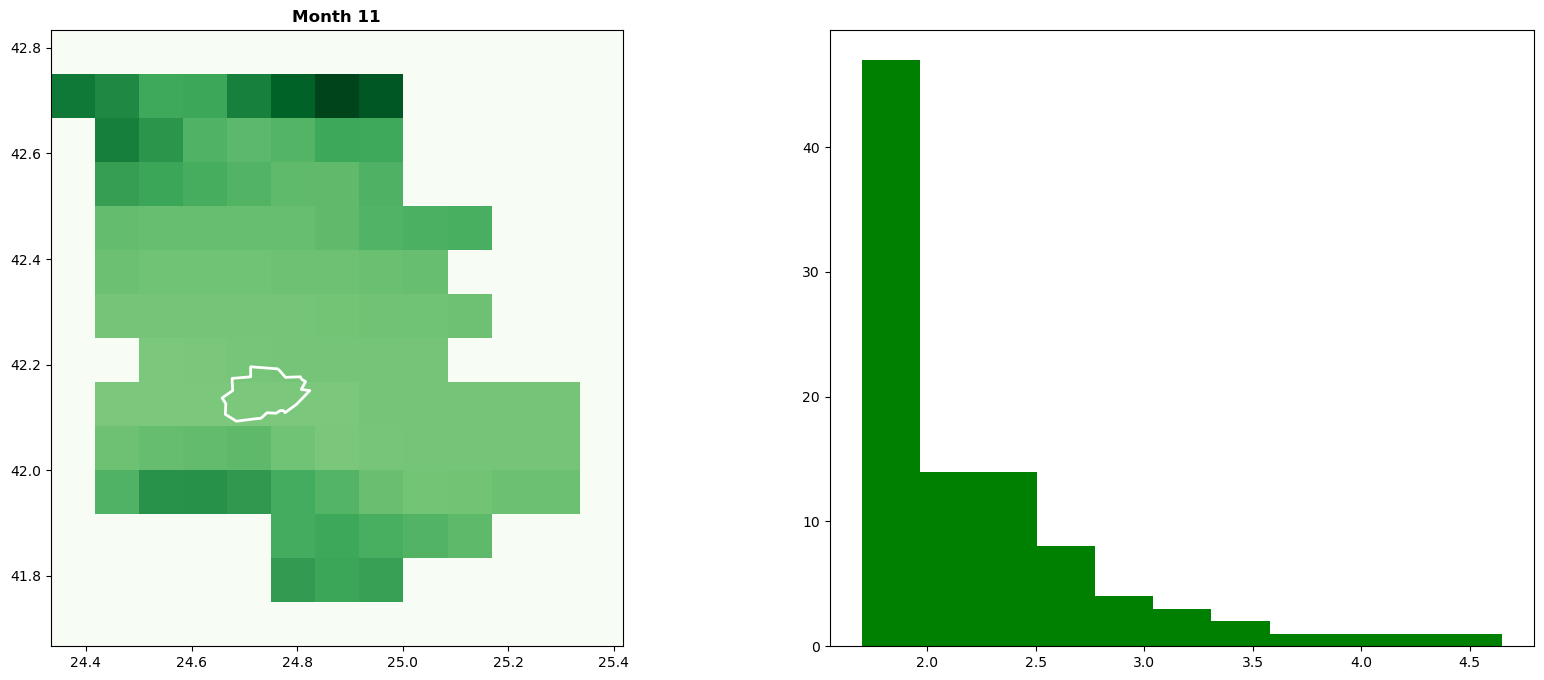

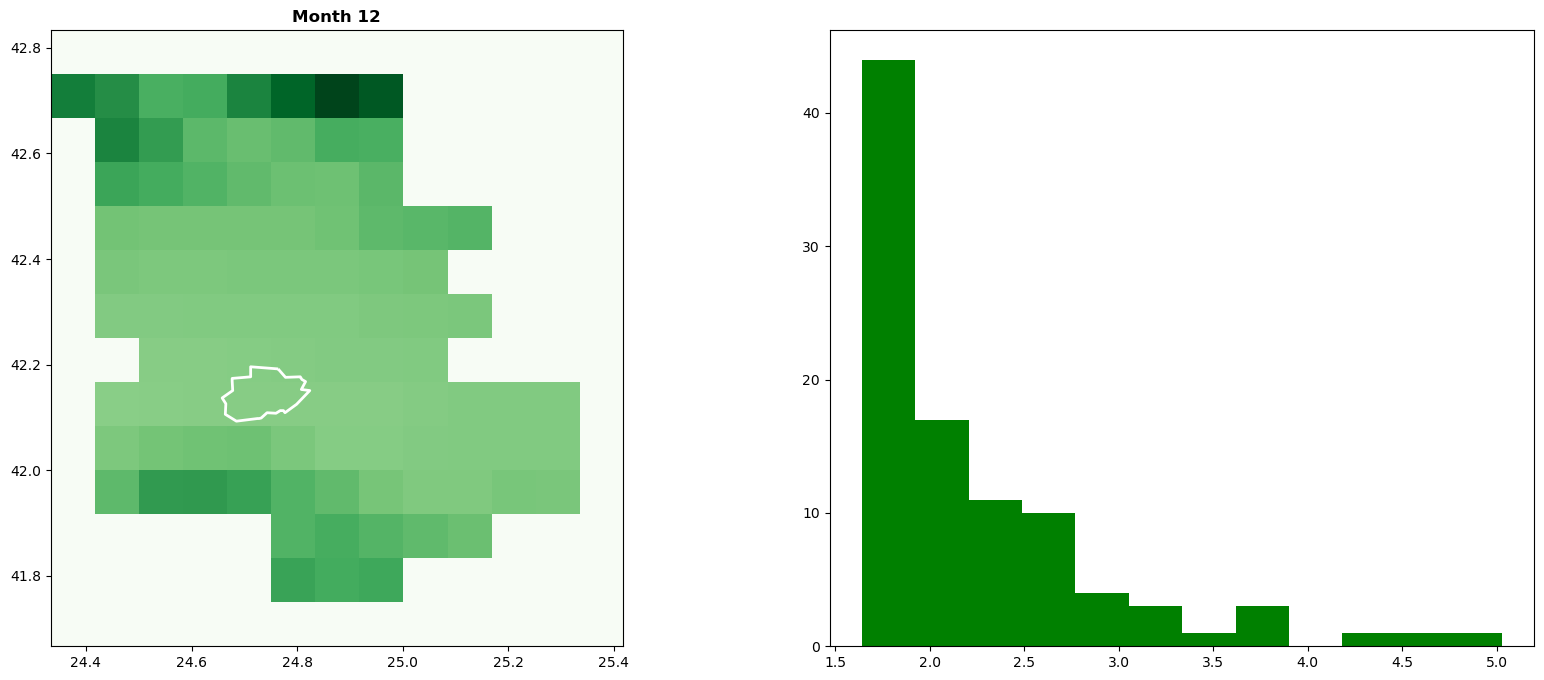

In [23]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
images_months_wind = {}
average_months_wind = {}
images_months_pld_city_wind = {}
average_months_pld_city_wind = {}

for m in all_months:
    file_name_prec = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\precipitation\\wc2.1_5m_wind\\wc2.1_5m_wind_{m}.tif"
    month_prec = rasterio.open(file_name_prec)
    month_data = month_prec.read(1)
    month_data[month_data == -3.3999999521443642e+38] = -1
    #show(month_data, transform = month_prec.transform)

    out_img, out_transform = mask(month_prec, coords, crop=True)
    out_meta = month_prec.meta
    out_img[out_img == -3.3999999521443642e+38] = -1

    pld_city_out, pld_city_out_transform = mask(month_prec, coords_pld_city, crop=True)
    out_meta = month_prec.meta
    pld_city_out[pld_city_out == -3.3999999521443642e+38] = -1

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig = plovdiv_city.plot(facecolor='None', edgecolor='white', linewidth=2, ax = ax1)
    show(out_img, cmap = "Greens", transform = out_transform, ax=ax1, title = f"Month {m}")
    ax2 = plt.hist(out_img[out_img != -1], bins='auto', color="green")
    #show_hist(out_img, bins=50, alpha=0.3, title=f"Wind speed Plovdiv {m}", ax = ax2)

    average_m = out_img[out_img != -1].mean()
    average_months_wind[m] = average_m
    average_m_city = pld_city_out[pld_city_out != -1].mean()
    average_months_pld_city_wind[m] = average_m_city

    images_months_wind[m] = (out_img, out_transform)
    images_months_pld_city_wind[m] = (pld_city_out, pld_city_out_transform)

    

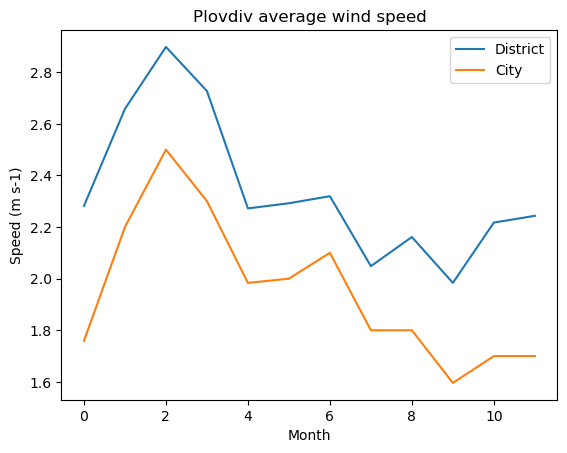

In [24]:
plt.plot(list(average_months_wind.values()), label = "District")
plt.plot(list(average_months_pld_city_wind.values()), label = "City")
plt.title("Plovdiv average wind speed")
plt.xlabel("Month")
plt.ylabel("Speed (m s-1)")
plt.legend()

# Average temp

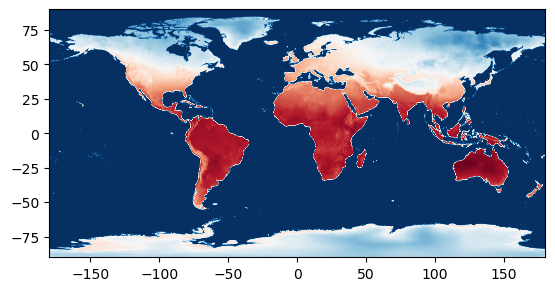

In [26]:
file_name_avgtemp = r"C:\Users\User\Documents\UNITN\Geospatial\For_GITHUB_project\Plovdiv_Infographics\Data\Climate\wc2.1_2.5m_tavg\wc2.1_2.5m_tavg_01.tif"
month_avgt = rasterio.open(file_name_avgtemp)
month_data_avgt = month_avgt.read(1)
month_data_avgt[month_data_avgt == -3.39999995e+38] = -60


show(month_data_avgt, transform = month_avgt.transform, cmap = "RdBu_r")

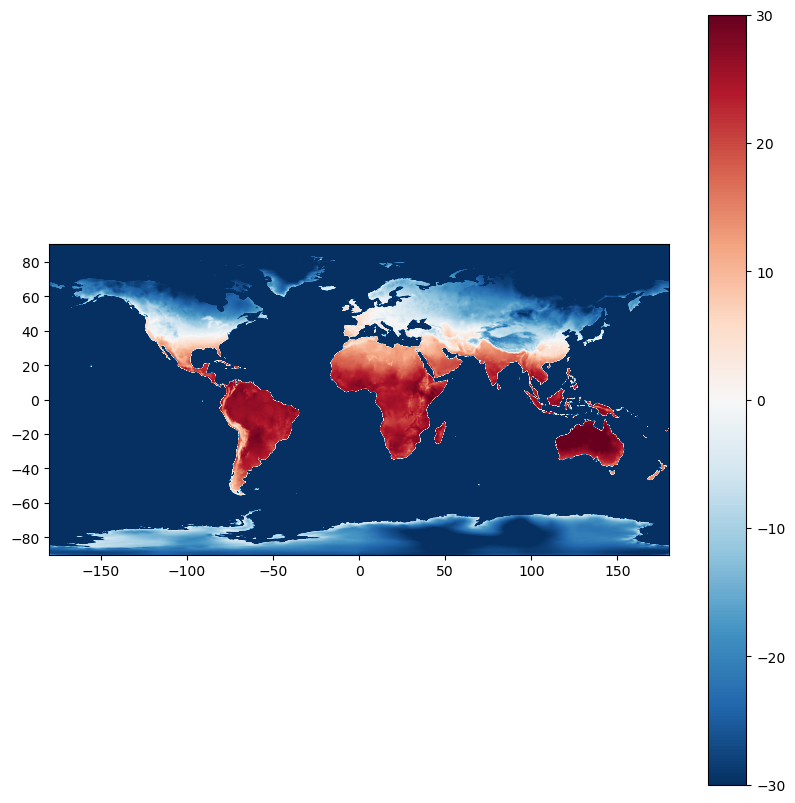

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

image_hidden = ax.imshow(month_data_avgt, 
                         cmap = "RdBu_r", 
                         vmin=-30, 
                         vmax=30)

image = show(month_data_avgt, 
                      transform=month_avgt.transform, 
                      ax=ax, cmap = "RdBu_r", 
                      vmin=-30, 
                      vmax=30)

fig.colorbar(image_hidden, ax=ax)



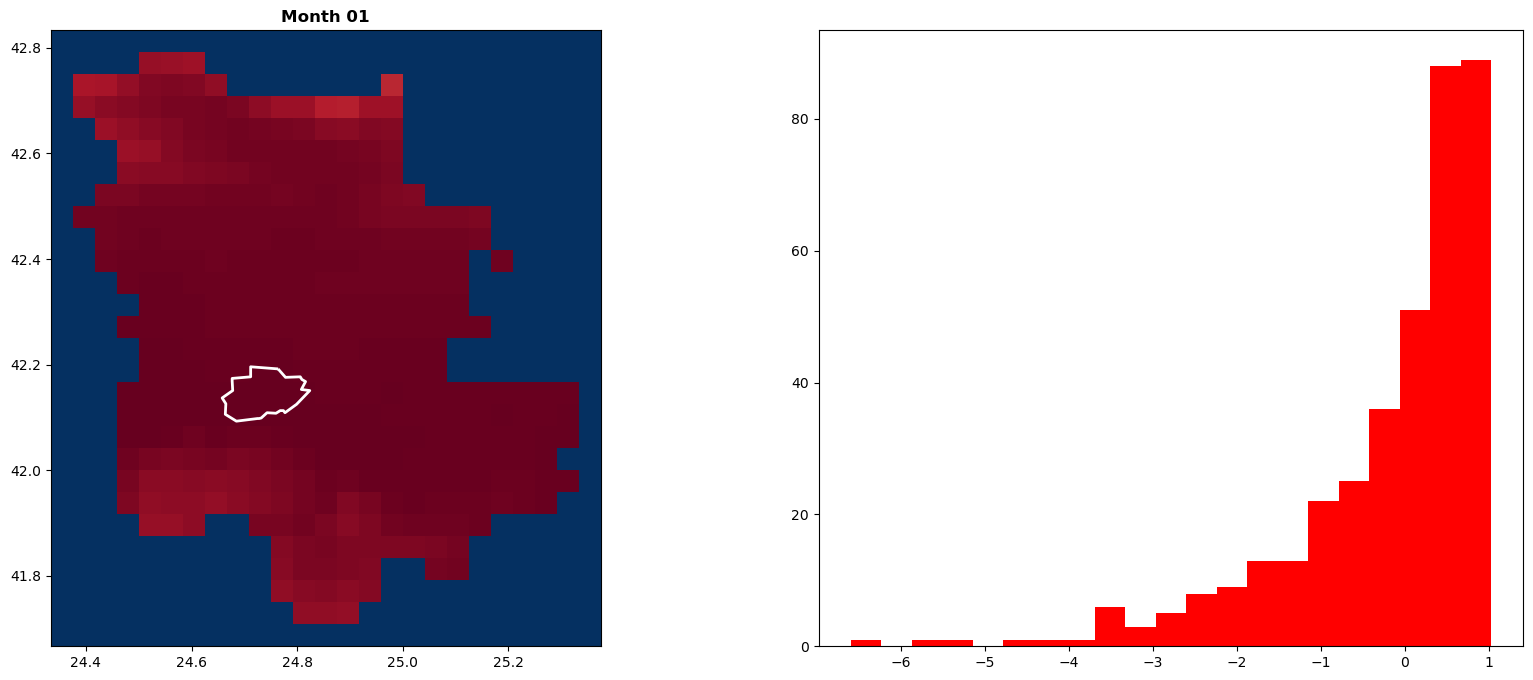

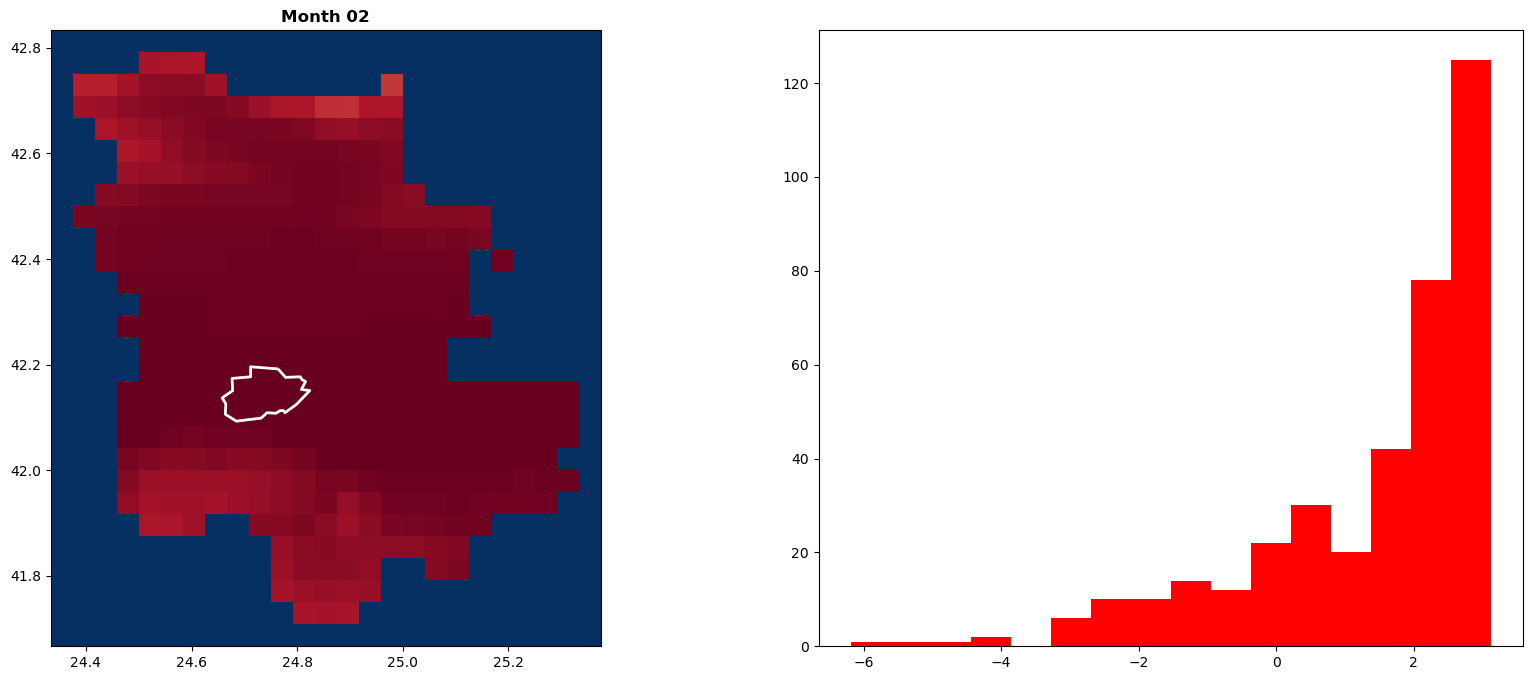

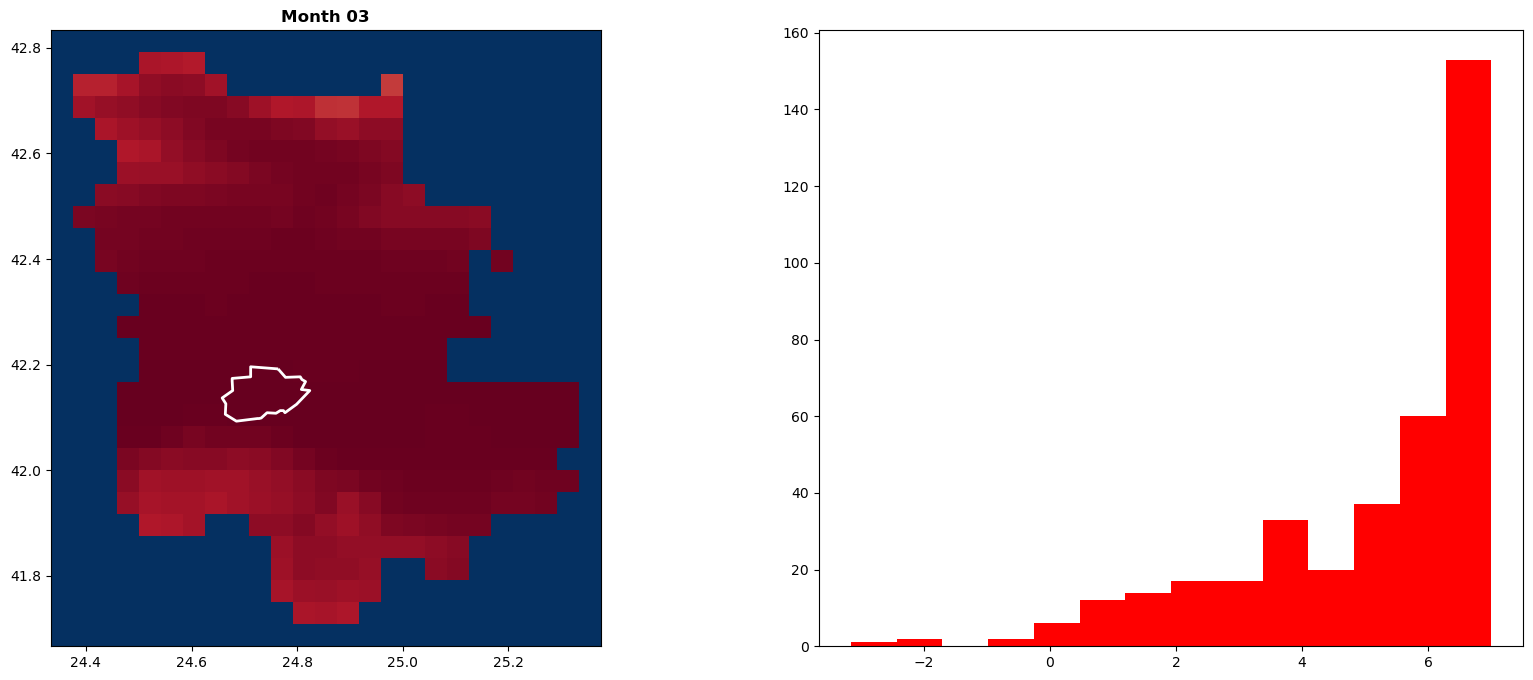

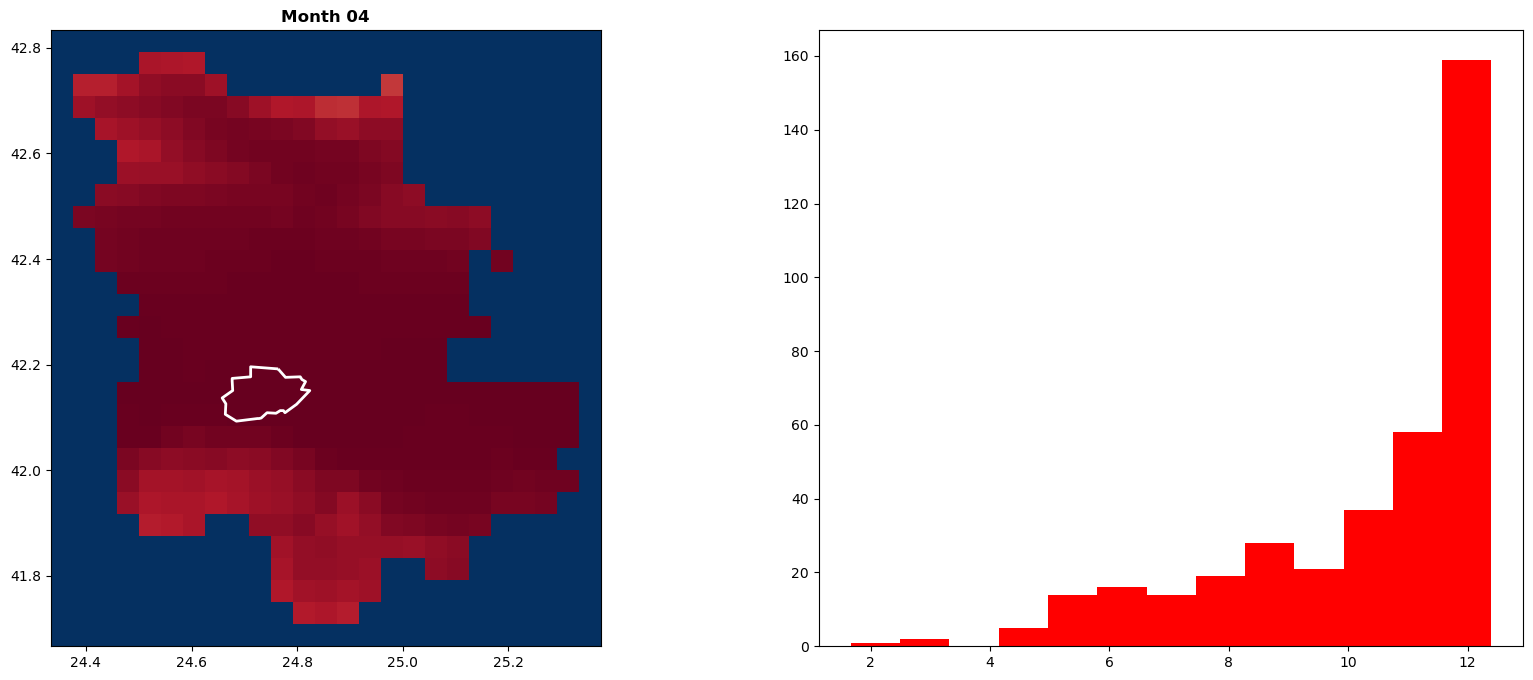

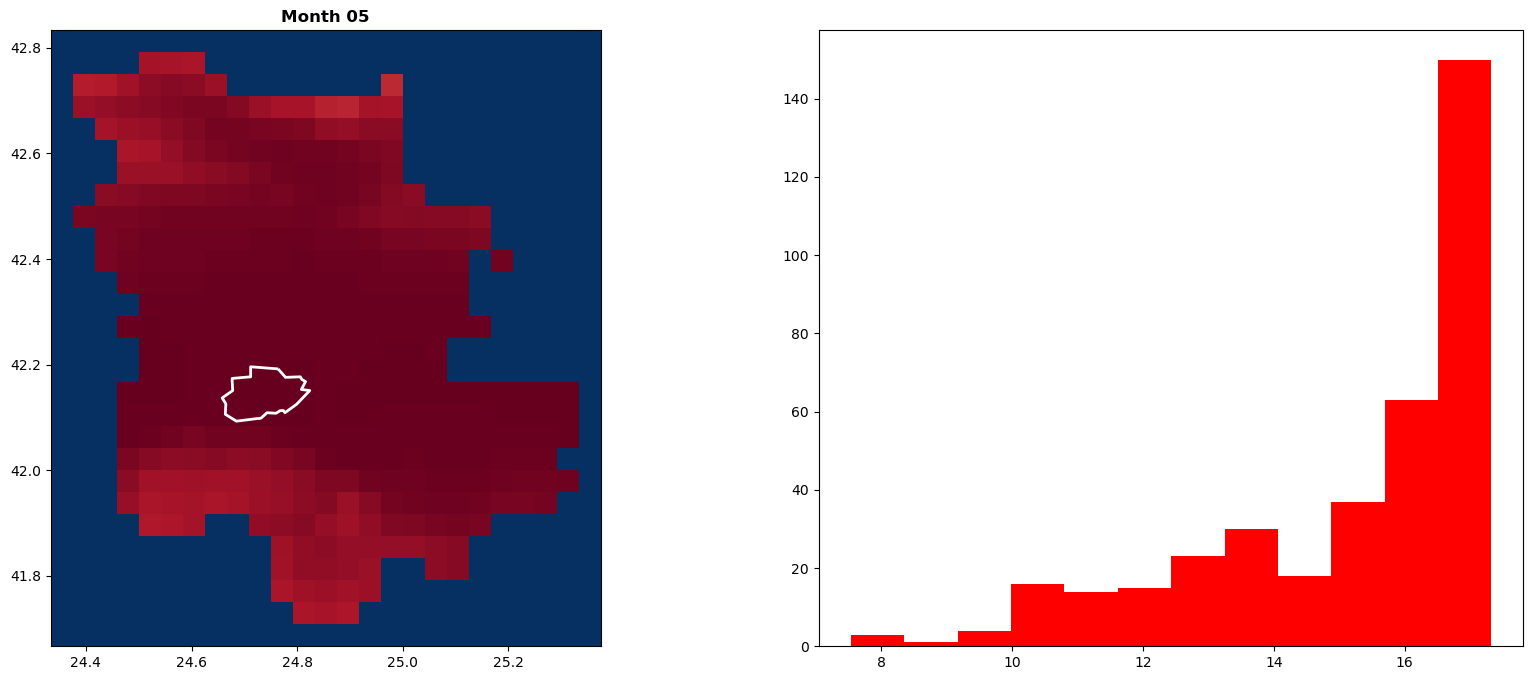

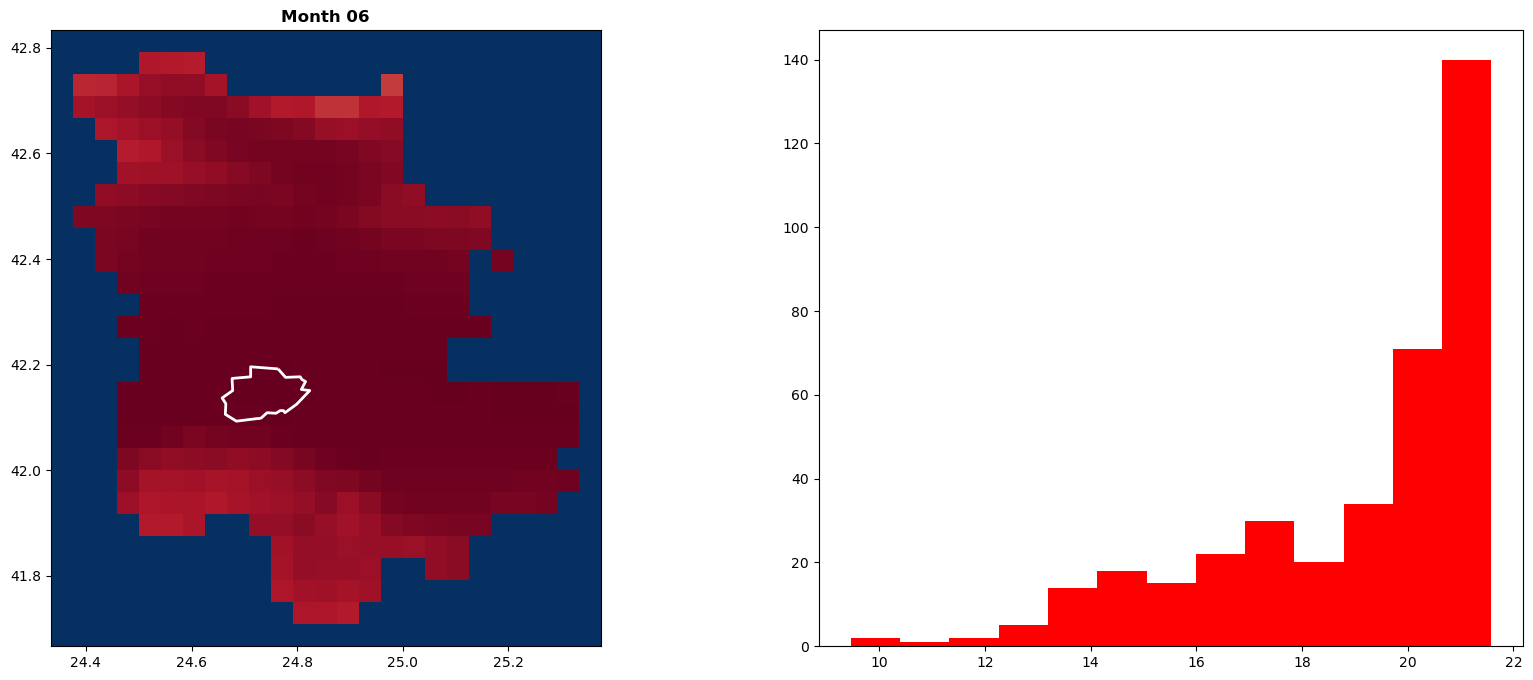

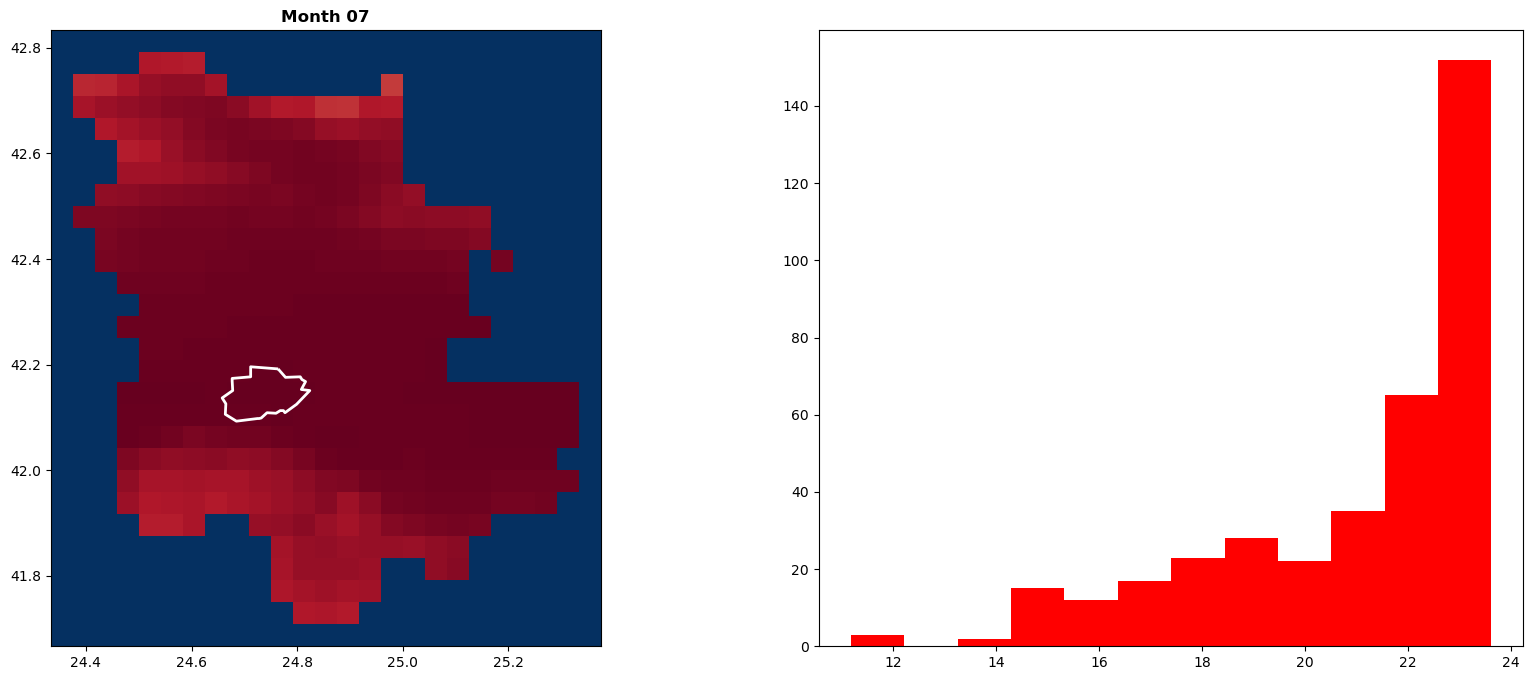

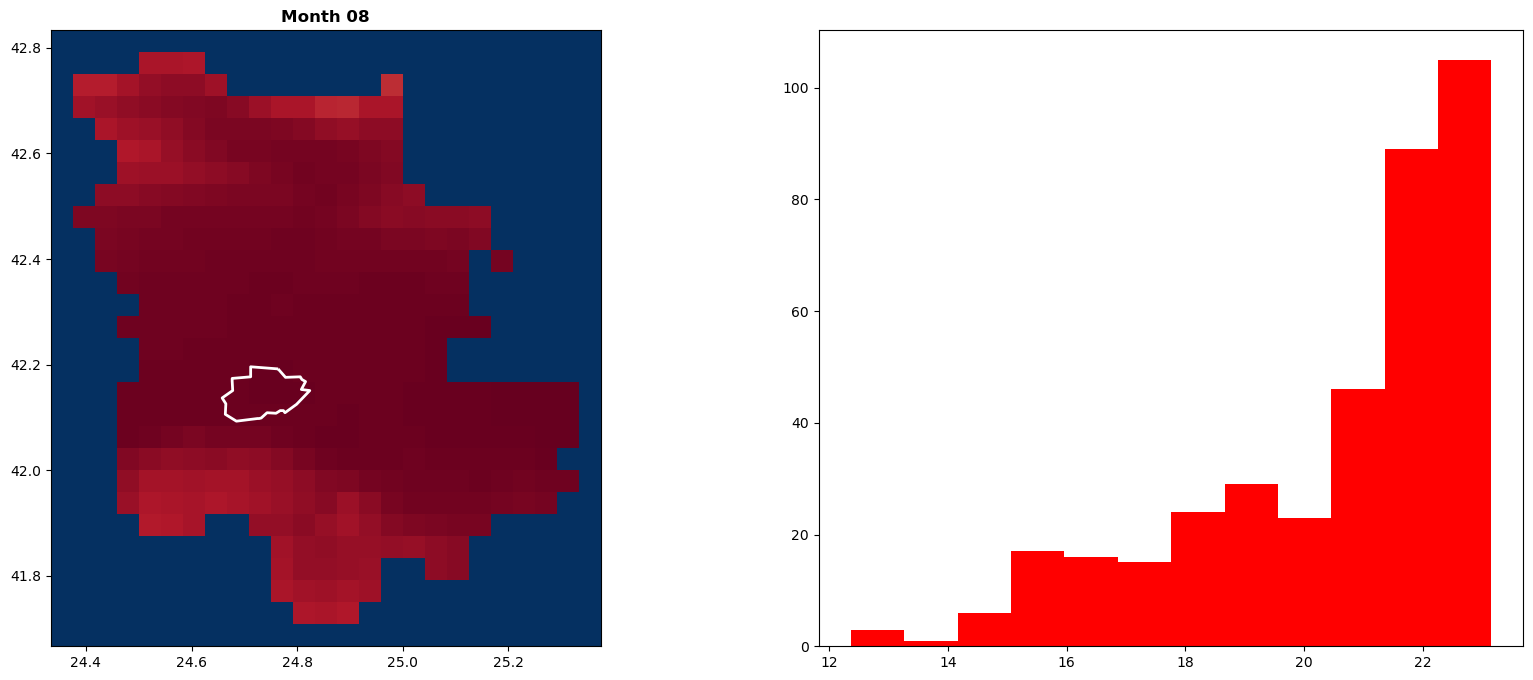

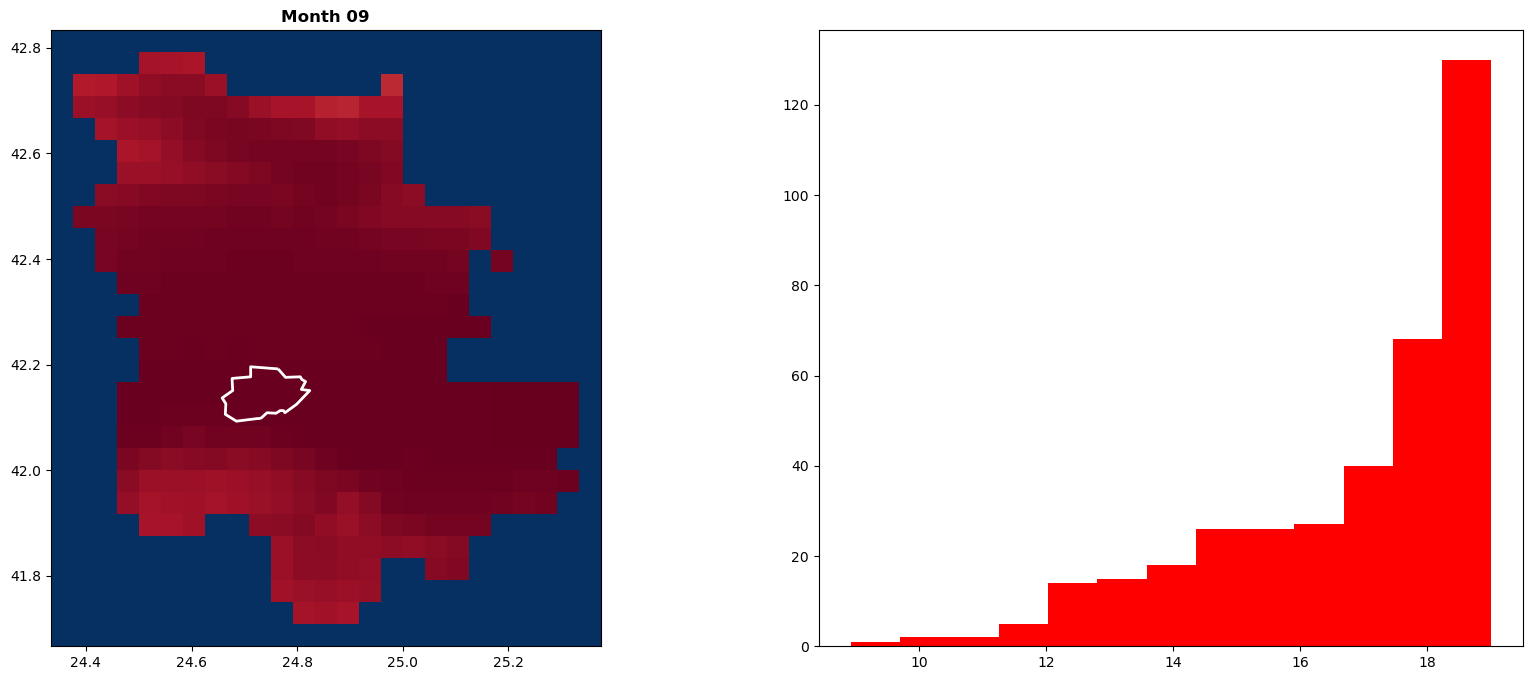

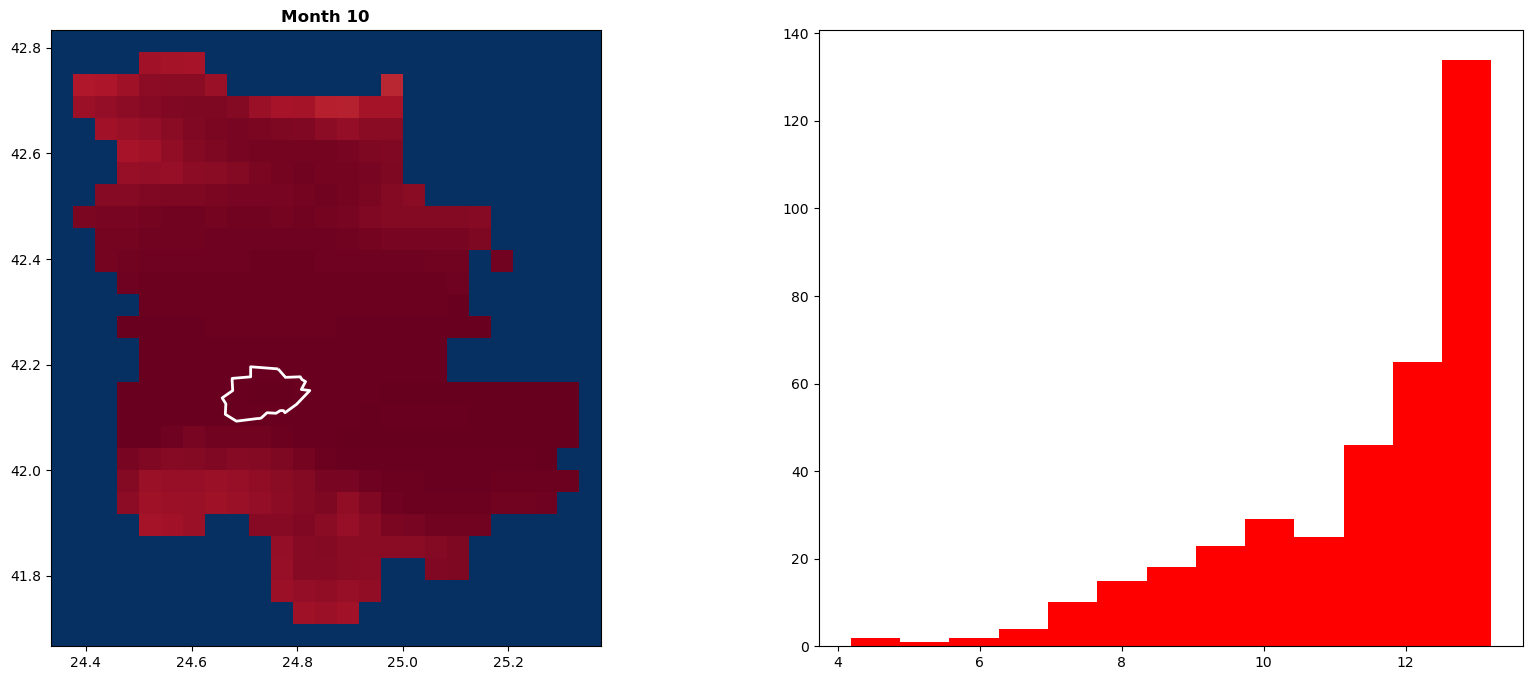

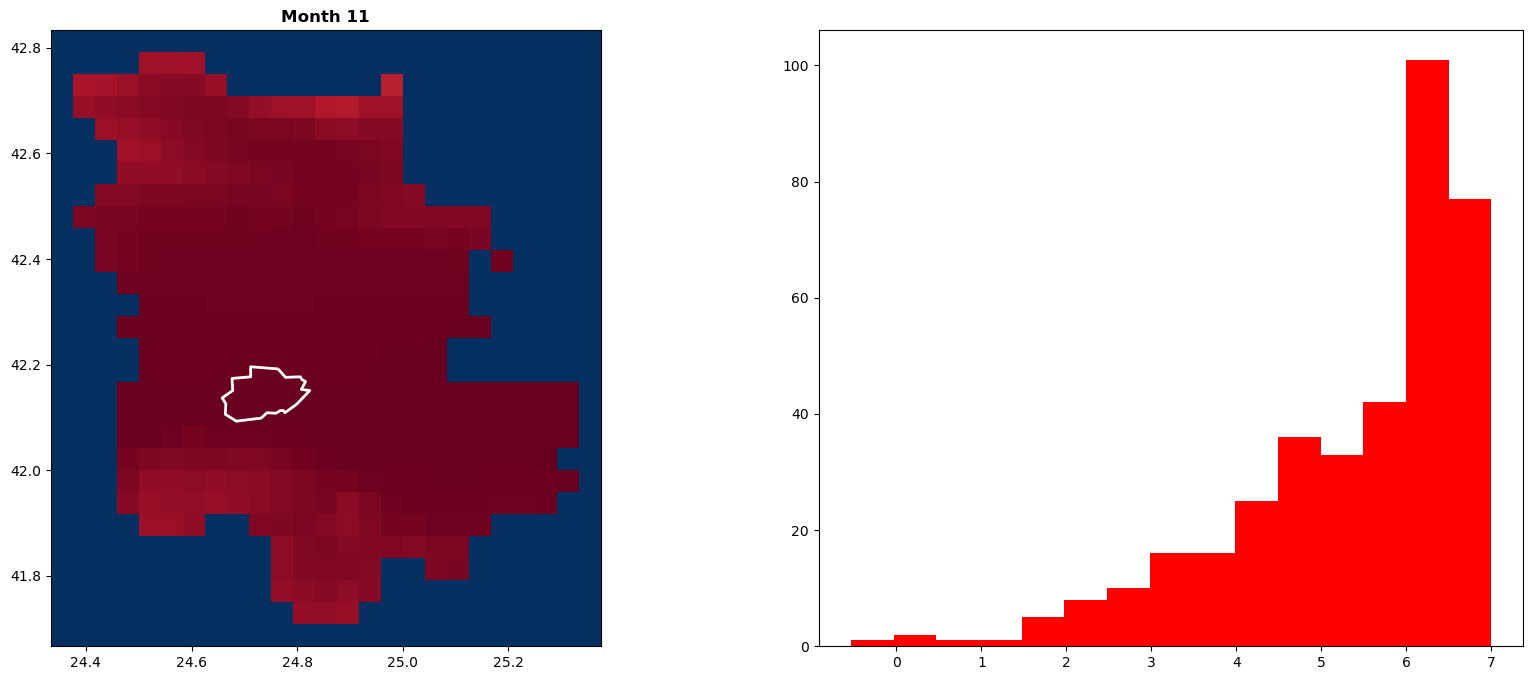

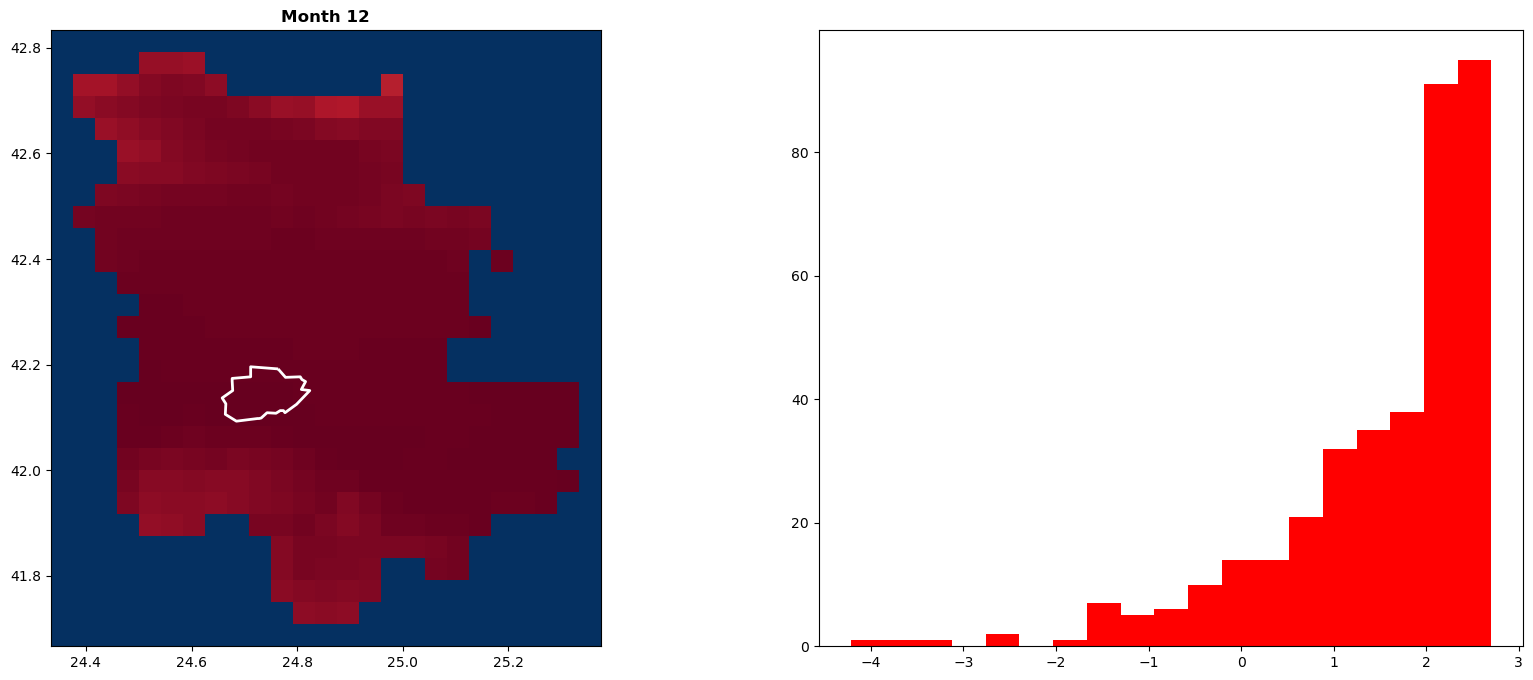

In [32]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
images_months_avgt = {}
average_months_avgt = {}
images_months_pld_city_avgt = {}
average_months_pld_city_avgt = {}

for m in all_months:
    file_name_avgt = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\For_GITHUB_project\\Plovdiv_Infographics\\Data\\Climate\\wc2.1_2.5m_tavg\\wc2.1_2.5m_tavg_{m}.tif"
    month_avgt = rasterio.open(file_name_avgt)
    month_data = month_avgt.read(1)
    month_data[month_data == -3.39999995e+38] = -60
    #show(month_data, transform = month_prec.transform)

    out_img, out_transform = mask(month_avgt, coords, crop=True)
    out_meta = month_avgt.meta
    out_img[out_img == -3.39999995e+38] = -60

    pld_city_out, pld_city_out_transform = mask(month_avgt, coords_pld_city, crop=True)
    out_meta = month_avgt.meta
    pld_city_out[pld_city_out == -3.39999995e+38] = -60

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig = plovdiv_city.plot(facecolor='None', edgecolor='white', linewidth=2, ax = ax1)
    show(out_img, cmap = "RdBu_r", transform = out_transform, ax=ax1, title = f"Month {m}")
    ax2 = plt.hist(out_img[out_img != -60], bins='auto', color="red")
    #show_hist(out_img, bins=50, alpha=0.3, title=f"Average Temperature Plovdiv {m}", ax = ax2)

    average_m = out_img[out_img != -60].mean()
    average_months_avgt[m] = average_m
    average_m_city = pld_city_out[pld_city_out != -60].mean()
    average_months_pld_city_avgt[m] = average_m_city

    images_months_avgt[m] = (out_img, out_transform)
    images_months_pld_city_avgt[m] = (pld_city_out, pld_city_out_transform)

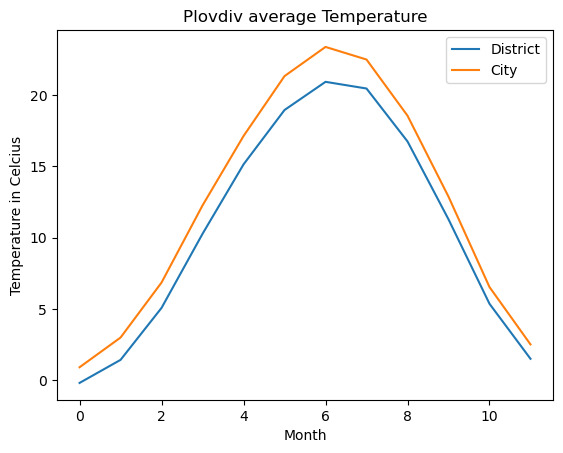

In [33]:
plt.plot(list(average_months_avgt.values()), label = "District")
plt.plot(list(average_months_pld_city_avgt.values()), label = "City")
plt.title("Plovdiv average Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")
plt.legend()

# Appendix

## Getting the coordinates of a point from the raster

In [15]:
indices = np.where(month_data_avgt == month_data_avgt.max())
month_data_avgt.max()
month_data_avgt.flatten()[month_data_avgt.argmax()]
month_data_avgt[2724, 7135]
month_data_avgt[indices[0][0], indices[1][0]]

34.1

In [57]:
import pandas as pd

In [72]:
point = month_avgt.xy(2724, 7135)
df = pd.DataFrame({"Latitude": point[1], "Longitude": point[0]}, index = [0])
point = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs = month_avgt.crs)


,Latitude,Longitude
0,-23.520833,117.3125
